In [ ]:
# Load feature vector csv
import pandas as pd

#disable an unexpected warning on the new pandas version
import warnings
from sklearn.utils.multiclass import type_of_target

warnings.filterwarnings(
    "ignore",
    message="The number of unique classes is greater than 50% of the number of samples."
)

csv_path = r"C:\Users\Davide Mascheroni\Desktop\movingText\movingText\Feature_csv\feature_vector.csv"
#csv_path = r"C:\Users\david\OneDrive\Documenti\Tesi_BehavBio\Programs\Feature_csv\feature_vector.csv"
dataset = pd.read_csv(csv_path)
display(dataset)

,file_key,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82
0,T1_S1_TRY1_VB_SL_LIT,57,0.04688,0.60925,0.251515,0.228373,0.246580,0.108956,0.071780,0.900959,...,0.18165,0.18165,1.079605,1.610681,2.843415,3.024820,33,23,41,15
1,T1_S1_TRY1_HS_SL_LIT,45,0.11426,0.77112,0.322219,0.282340,0.267210,0.172174,0.099730,0.966898,...,0.12931,0.17533,0.508646,0.626663,0.901792,0.438980,22,22,23,21
2,T1_S1_TRY1_VB_SL_BIG,59,0.03345,0.93579,0.239702,0.215981,0.226560,0.128417,0.041380,3.328440,...,0.18513,0.18513,1.060574,1.026440,5.407974,5.173056,37,21,43,15
3,T1_S1_TRY1_HS_SL_BIG,90,0.01978,0.72949,0.154105,0.132798,0.120730,0.106873,0.032840,3.084167,...,0.15181,0.21207,2.847437,3.061352,2.888738,2.369702,45,43,46,42
4,T1_S1_TRY1_VB_FA_LIT,65,0.02087,1.28003,0.239979,0.207705,0.221190,0.159702,0.063050,4.316584,...,0.00000,0.00000,1.624835,1.000478,4.037489,3.748897,44,19,48,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299,T33_S3_TRY3_HS_SL_BIG,42,0.09625,0.99805,0.373094,0.319370,0.300230,0.225034,0.104915,1.419665,...,0.00000,0.00000,0.475639,0.557531,0.921234,0.387021,23,18,24,17
2300,T33_S3_TRY3_VB_FA_LIT,57,0.02625,0.62970,0.261618,0.234139,0.247500,0.116631,0.061700,0.879215,...,0.00000,0.00000,1.291447,0.896257,2.576642,2.272187,38,18,38,18
2301,T33_S3_TRY3_HS_FA_LIT,55,0.06659,1.94910,0.291847,0.253836,0.261050,0.242696,0.059450,5.758985,...,0.06423,0.06423,0.668593,0.677116,1.471649,1.645241,23,31,18,36
2302,T33_S3_TRY3_VB_FA_BIG,58,0.09448,0.51691,0.247106,0.227703,0.245025,0.094850,0.080200,0.305149,...,0.00000,0.00000,1.755014,1.697530,2.751862,2.710229,39,18,36,21


In [30]:
#split the dataset with random split (80-20) with stratification
from sklearn.model_selection import train_test_split

# Extract the tester number from file key
dataset['person_id'] = dataset['file_key'].apply(lambda x: x.split('_')[0])

# In x I put all the rows and all the column labeled from f0 to f82
X = dataset.loc[:, 'f0':'f82']

# The y indicate the classes and in our case we use the tester's number for identification
y = dataset['person_id']

# Use stratification on y to keep the same proportion when split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0, stratify=y)


In [31]:
#Pipeline using naivy bayes as classifier and random split(80-20) with stratification and feature selection

from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif

pipeline = Pipeline([
    ('inputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('nb', GaussianNB())
])

param_grid = {
    'scaler': [MinMaxScaler(), StandardScaler()],
    'feature_selection__k': [30, 40, 50, 60, 70]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)

best_k = grid_search.best_params_['feature_selection__k']
print("Best number of features selected (k):", best_k)

print("Best cross-validation accuracy:", grid_search.best_score_)

best_scaler = grid_search.best_estimator_.named_steps['scaler']
print("Best scaler:", best_scaler)


print("Train set accuracy:", grid_search.best_estimator_.score(X_train, y_train))
print("Test set accuracy:", grid_search.best_estimator_.score(X_test, y_test))


Best params: {'feature_selection__k': 60, 'scaler': MinMaxScaler()}
Best number of features selected (k): 60
Best cross-validation accuracy: 0.6266672558029928
Best scaler: MinMaxScaler()
Train set accuracy: 0.6977753662506783
Test set accuracy: 0.6594360086767896



Top 60 features and their ANOVA F-scores:
f34: 226.3805
f35: 221.9699
f44: 221.6170
f45: 217.2250
f36: 213.7271
f46: 211.5785
f33: 173.0353
f43: 143.7139
f64: 126.8569
f65: 123.4011
f55: 89.1035
f56: 85.8270
f54: 82.9017
f71: 61.8832
f52: 52.5152
f62: 46.2212
f58: 34.6844
f67: 31.7058
f63: 31.3373
f60: 30.2180
f69: 29.4279
f66: 29.3897
f53: 19.8119
f39: 18.9458
f32: 18.4912
f57: 18.3961
f80: 18.3449
f49: 18.2609
f37: 17.9848
f42: 17.5379
f4: 15.0130
f68: 14.7682
f0: 14.3618
f5: 13.7388
f38: 12.6466
f47: 12.6314
f82: 12.0490
f41: 11.9638
f3: 11.8775
f59: 11.7336
f72: 11.6974
f51: 11.0834
f27: 10.8150
f29: 10.6345
f73: 10.6095
f74: 10.4148
f40: 10.2646
f2: 9.1475
f26: 8.9713
f19: 8.5734
f81: 8.5667
f6: 8.5178
f48: 8.0710
f17: 8.0164
f77: 7.1112
f1: 6.6953
f50: 6.6838
f10: 6.3662
f8: 6.3571
f7: 6.1060


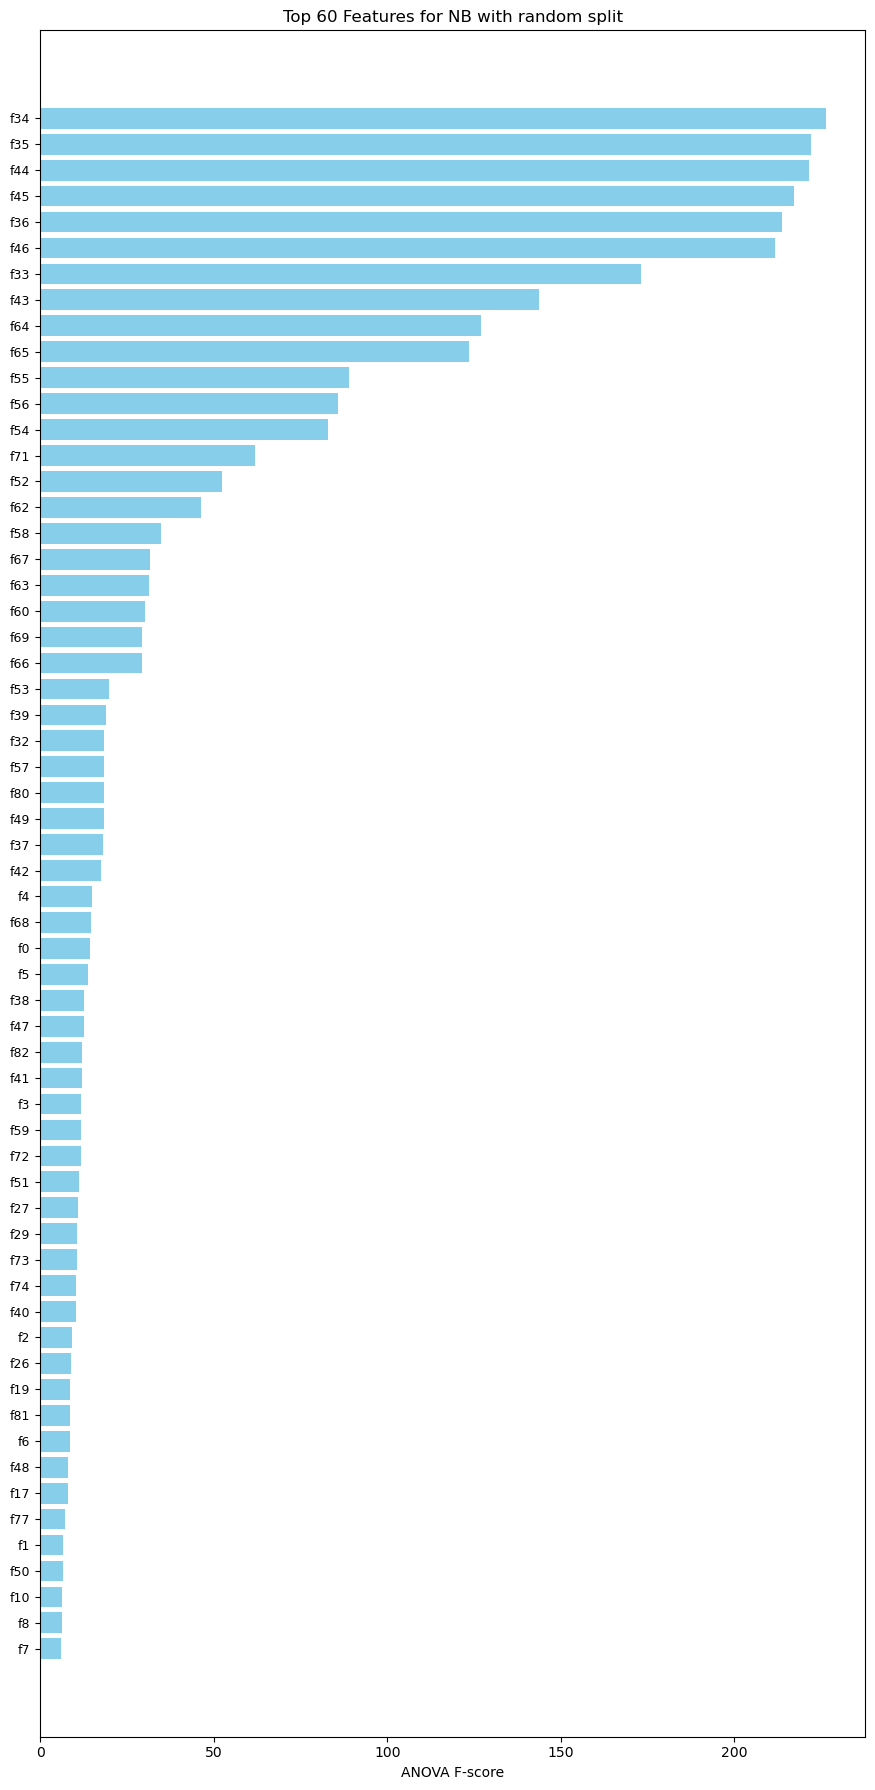

In [32]:
#Best features for naivy bayes with 80-20 random split and feature selection
import matplotlib.pyplot as plt
import pandas as pd

feature_names = X_train.columns

selector = grid_search.best_estimator_.named_steps['feature_selection']
support_mask = selector.get_support()
scores = selector.scores_

selected_features = feature_names[support_mask]
selected_scores = scores[support_mask]

sorted_idx = selected_scores.argsort()[::-1]
sorted_features = selected_features[sorted_idx]
sorted_scores = selected_scores[sorted_idx]

k = grid_search.best_params_['feature_selection__k']

print(f"\nTop {k} features and their ANOVA F-scores:")
for name, score in zip(sorted_features[:k], sorted_scores[:k]):
    print(f"{name}: {score:.4f}")

plt.figure(figsize=(12, max(6, k * 0.3)))
plt.barh(sorted_features[:k][::-1], sorted_scores[:k][::-1], color='skyblue')
plt.xlabel('ANOVA F-score')
plt.title(f'Top {k} Features for NB with random split')
plt.tight_layout()
plt.subplots_adjust(left=0.3)
plt.yticks(fontsize=9)

plt.savefig(r'C:\Users\david\OneDrive\Documenti\Tesi_BehavBio\Programs\Programs\Machine_Learning\Machine_Learning_results\Best_Features\nb_rs.png')
plt.show()


In [33]:
#Pipeline using knn as classifier and random split(80-20) with stratification

from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    #Fill the Nan with the mean on the dataset of that value
    ('imputer', SimpleImputer(strategy='mean')),
    #It is simply a placeholder
    ('scaler', MinMaxScaler()), 
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    #MinMax and Standard scaler
    'scaler': [MinMaxScaler(), StandardScaler()],
    'feature_selection__k': [30, 40, 50, 60, 70],
    #Number of neighbors
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    #weight that each neighbour have on the voting process
    #Uniform = everybody have the same weight
    #Distance = Neighbors are weighted by the inverse of their distance 
    'knn__weights': ['uniform', 'distance'],
    #Distance metric used
    'knn__metric': ['minkowski', 'euclidean', 'manhattan'],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)

best_k = grid_search.best_params_['feature_selection__k']
print("Best number of features selected (k):", best_k)

print("Best cross-validation accuracy:", grid_search.best_score_)

best_scaler = grid_search.best_estimator_.named_steps['scaler']
print("Best scaler:", best_scaler)

print("Train set accuracy:", grid_search.best_estimator_.score(X_train, y_train))
print("Test set accuracy:", grid_search.best_estimator_.score(X_test, y_test))

Best params: {'feature_selection__k': 60, 'knn__metric': 'manhattan', 'knn__n_neighbors': 7, 'knn__weights': 'distance', 'scaler': StandardScaler()}
Best number of features selected (k): 60
Best cross-validation accuracy: 0.7140435371745021
Best scaler: StandardScaler()
Train set accuracy: 1.0
Test set accuracy: 0.7418655097613883



Top 60 features and their ANOVA F-scores:
f34: 226.3805
f35: 221.9699
f44: 221.6170
f45: 217.2250
f36: 213.7271
f46: 211.5785
f33: 173.0353
f43: 143.7139
f64: 126.8569
f65: 123.4011
f55: 89.1035
f56: 85.8270
f54: 82.9017
f71: 61.8832
f52: 52.5152
f62: 46.2212
f58: 34.6844
f67: 31.7058
f63: 31.3373
f60: 30.2180
f69: 29.4279
f66: 29.3897
f53: 19.8119
f39: 18.9458
f32: 18.4912
f57: 18.3961
f80: 18.3449
f49: 18.2609
f37: 17.9848
f42: 17.5379
f4: 15.0130
f68: 14.7682
f0: 14.3618
f5: 13.7388
f38: 12.6466
f47: 12.6314
f82: 12.0490
f41: 11.9638
f3: 11.8775
f59: 11.7336
f72: 11.6974
f51: 11.0834
f27: 10.8150
f29: 10.6345
f73: 10.6095
f74: 10.4148
f40: 10.2646
f2: 9.1475
f26: 8.9713
f19: 8.5734
f81: 8.5667
f6: 8.5178
f48: 8.0710
f17: 8.0164
f77: 7.1112
f1: 6.6953
f50: 6.6838
f10: 6.3662
f8: 6.3571
f7: 6.1060


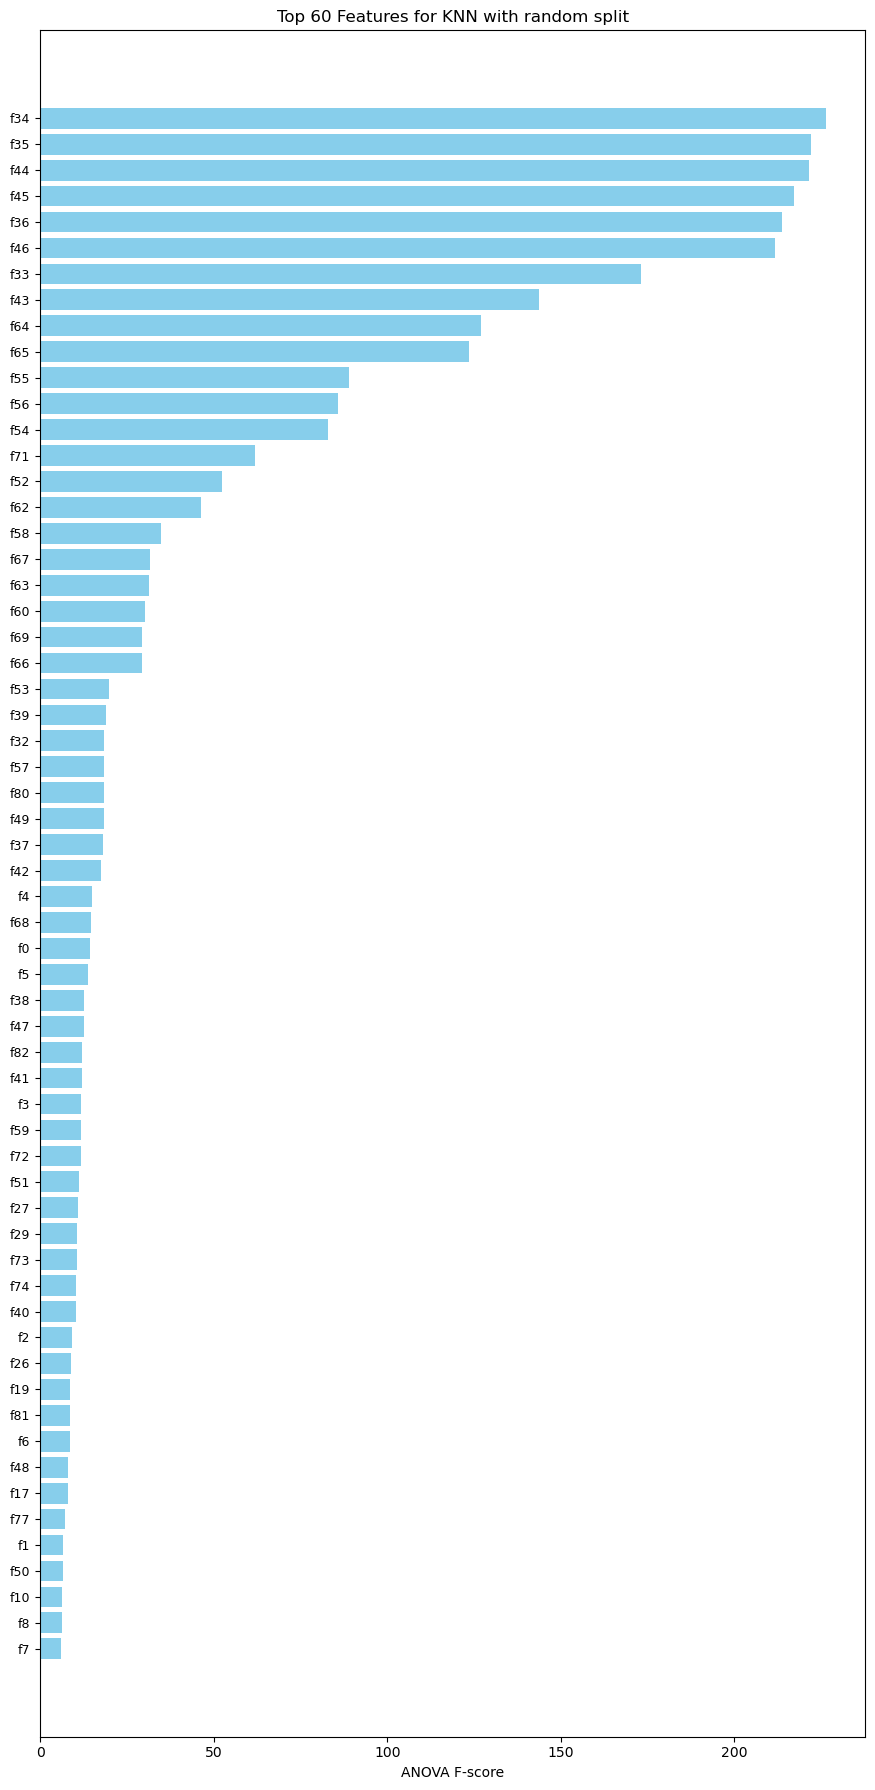

In [34]:
#Best features for knn with 80-20 random split
import matplotlib.pyplot as plt
import pandas as pd

feature_names = X_train.columns

selector = grid_search.best_estimator_.named_steps['feature_selection']
support_mask = selector.get_support()
scores = selector.scores_

selected_features = feature_names[support_mask]
selected_scores = scores[support_mask]

sorted_idx = selected_scores.argsort()[::-1]
sorted_features = selected_features[sorted_idx]
sorted_scores = selected_scores[sorted_idx]

k = grid_search.best_params_['feature_selection__k']

print(f"\nTop {k} features and their ANOVA F-scores:")
for name, score in zip(sorted_features[:k], sorted_scores[:k]):
    print(f"{name}: {score:.4f}")

plt.figure(figsize=(12, max(6, k * 0.3)))
plt.barh(sorted_features[:k][::-1], sorted_scores[:k][::-1], color='skyblue')
plt.xlabel('ANOVA F-score')
plt.title(f'Top {k} Features for KNN with random split')
plt.tight_layout()
plt.subplots_adjust(left=0.3)
plt.yticks(fontsize=9)

plt.savefig(r'C:\Users\david\OneDrive\Documenti\Tesi_BehavBio\Programs\Programs\Machine_Learning\Machine_Learning_results\Best_Features\knn_rs.png')  


In [36]:
#Pipeline using logistic regression as classifier and random split(80-20) with stratification and feature selection

from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('inputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('logreg', LogisticRegression(max_iter = 1000, random_state = 0))
])

param_grid = {
    'scaler': [MinMaxScaler(), StandardScaler()],
    'feature_selection__k': [30, 40, 50, 60, 70],
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

best_scaler = grid_search.best_estimator_.named_steps['scaler']
print("Best scaler:", best_scaler)

print("Train set accuracy:", grid_search.best_estimator_.score(X_train, y_train))
print("Test set accuracy:", grid_search.best_estimator_.score(X_test, y_test))


Best params: {'feature_selection__k': 70, 'logreg__C': 1, 'scaler': StandardScaler()}
Best cross-validation accuracy: 0.698845292800754
Best scaler: StandardScaler()
Train set accuracy: 0.8952794357026587
Test set accuracy: 0.7396963123644251



Top 70 features and their ANOVA F-scores:
f34: 226.3805
f35: 221.9699
f44: 221.6170
f45: 217.2250
f36: 213.7271
f46: 211.5785
f33: 173.0353
f43: 143.7139
f64: 126.8569
f65: 123.4011
f55: 89.1035
f56: 85.8270
f54: 82.9017
f71: 61.8832
f52: 52.5152
f62: 46.2212
f58: 34.6844
f67: 31.7058
f63: 31.3373
f60: 30.2180
f69: 29.4279
f66: 29.3897
f53: 19.8119
f39: 18.9458
f32: 18.4912
f57: 18.3961
f80: 18.3449
f49: 18.2609
f37: 17.9848
f42: 17.5379
f4: 15.0130
f68: 14.7682
f0: 14.3618
f5: 13.7388
f38: 12.6466
f47: 12.6314
f82: 12.0490
f41: 11.9638
f3: 11.8775
f59: 11.7336
f72: 11.6974
f51: 11.0834
f27: 10.8150
f29: 10.6345
f73: 10.6095
f74: 10.4148
f40: 10.2646
f2: 9.1475
f26: 8.9713
f19: 8.5734
f81: 8.5667
f6: 8.5178
f48: 8.0710
f17: 8.0164
f77: 7.1112
f1: 6.6953
f50: 6.6838
f10: 6.3662
f8: 6.3571
f7: 6.1060
f15: 5.8576
f76: 5.8426
f31: 5.3916
f9: 5.3112
f75: 5.1991
f78: 5.1833
f18: 4.9678
f14: 4.7723
f20: 4.0242
f21: 3.9966


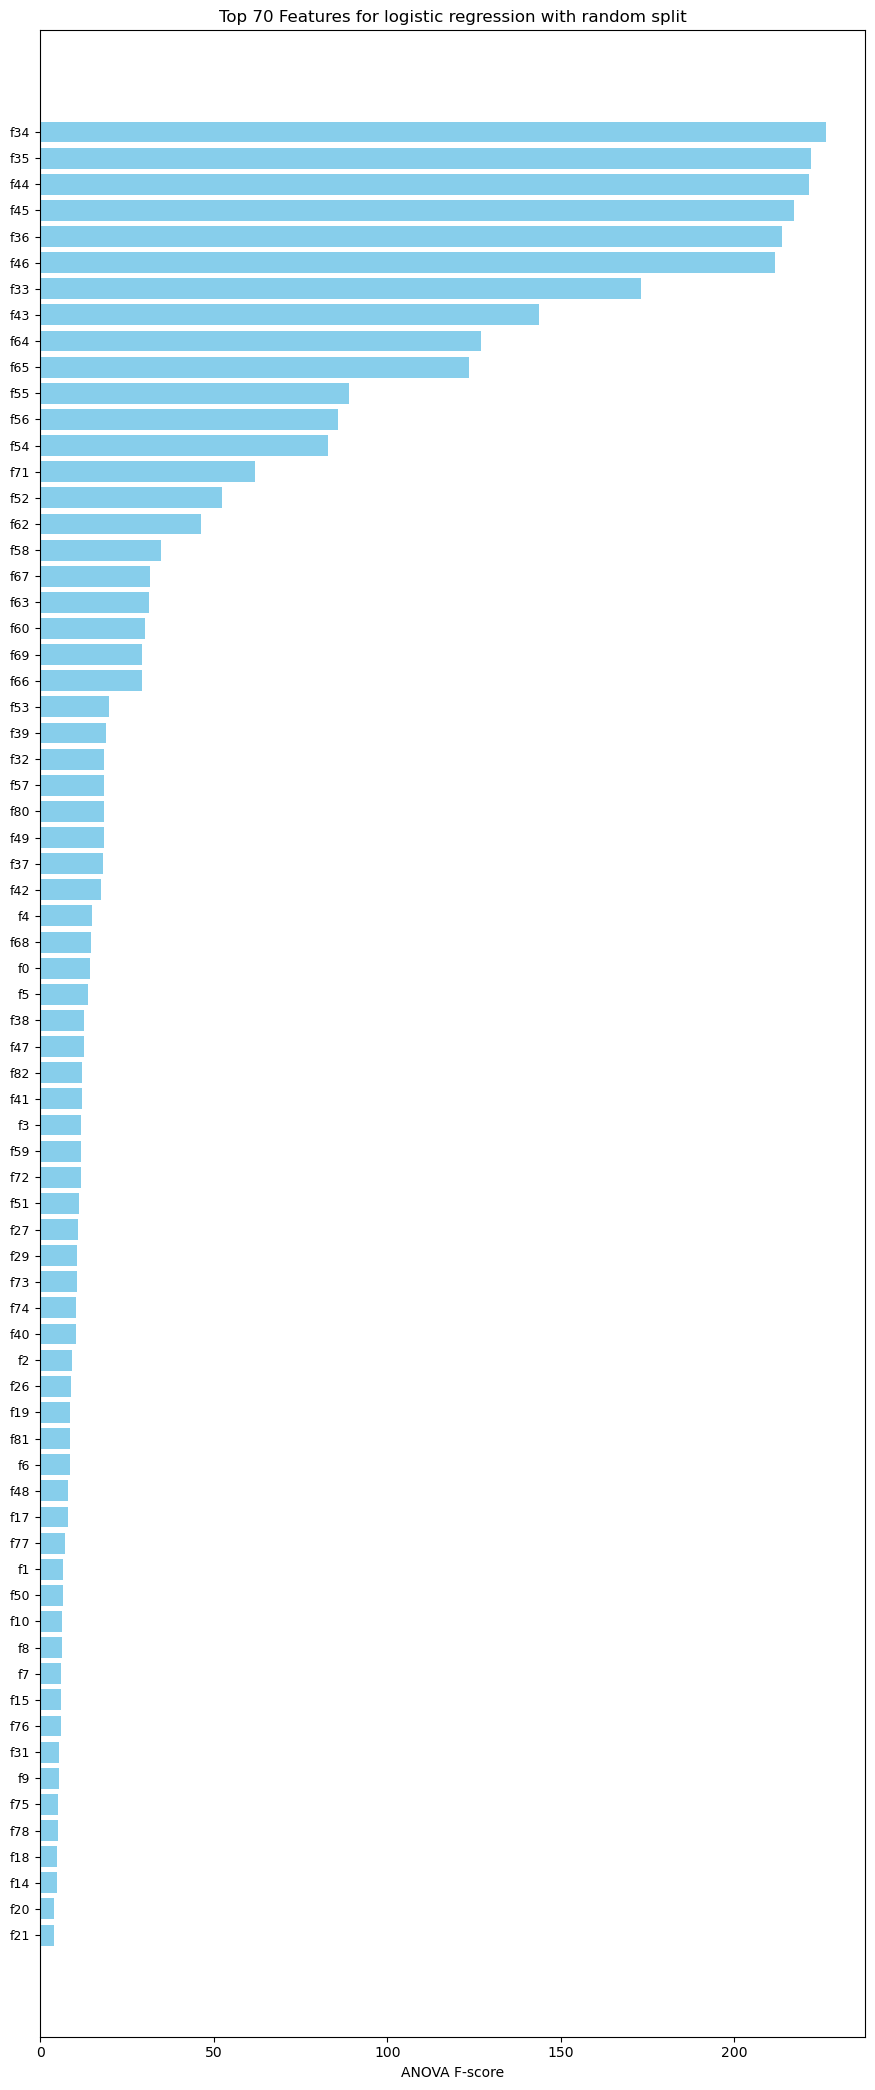

In [37]:
#Best features for logistic regression with 80-20 random split
import matplotlib.pyplot as plt
import pandas as pd

feature_names = X_train.columns

selector = grid_search.best_estimator_.named_steps['feature_selection']
support_mask = selector.get_support()
scores = selector.scores_

selected_features = feature_names[support_mask]
selected_scores = scores[support_mask]

sorted_idx = selected_scores.argsort()[::-1]
sorted_features = selected_features[sorted_idx]
sorted_scores = selected_scores[sorted_idx]

k = grid_search.best_params_['feature_selection__k']

print(f"\nTop {k} features and their ANOVA F-scores:")
for name, score in zip(sorted_features[:k], sorted_scores[:k]):
    print(f"{name}: {score:.4f}")

plt.figure(figsize=(12, max(6, k * 0.3)))
plt.barh(sorted_features[:k][::-1], sorted_scores[:k][::-1], color='skyblue')
plt.xlabel('ANOVA F-score')
plt.title(f'Top {k} Features for logistic regression with random split')
plt.tight_layout()
plt.subplots_adjust(left=0.3)
plt.yticks(fontsize=9)

plt.savefig(r'C:\Users\david\OneDrive\Documenti\Tesi_BehavBio\Programs\Programs\Machine_Learning\Machine_Learning_results\Best_Features\logreg_rs.png')  
plt.show()


In [38]:
#Pipeline using NUsvc as classifier and random split(80-20) with stratification and feature selection

from sklearn.svm import NuSVC

pipeline = Pipeline([
    ('inputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),  # Placeholder; to be searched
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('svc', NuSVC())  # Replace rf with NuSVC
])

param_grid = {
    'scaler': [MinMaxScaler(), StandardScaler()],
    'feature_selection__k': [30, 40, 50, 60, 70],
    'svc__nu': [0.25, 0.5, 0.75],  
    'svc__kernel': ['rbf', 'poly', 'sigmoid'],
    'svc__gamma': ['scale', 'auto']
}

# Grid search with 5-fold CV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Output best parameters and scores
print("Best params:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Get best scaler
best_scaler = grid_search.best_estimator_.named_steps['scaler']
print("Best scaler:", best_scaler)

# Train/test accuracy
print("Train set accuracy:", grid_search.best_estimator_.score(X_train, y_train))
print("Test set accuracy:", grid_search.best_estimator_.score(X_test, y_test))


Best params: {'feature_selection__k': 70, 'scaler': StandardScaler(), 'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'svc__nu': 0.25}
Best cross-validation accuracy: 0.7639654766112878
Best scaler: StandardScaler()
Train set accuracy: 0.9712425393380358
Test set accuracy: 0.7809110629067245



Top 70 features and their ANOVA F-scores:
f34: 226.3805
f35: 221.9699
f44: 221.6170
f45: 217.2250
f36: 213.7271
f46: 211.5785
f33: 173.0353
f43: 143.7139
f64: 126.8569
f65: 123.4011
f55: 89.1035
f56: 85.8270
f54: 82.9017
f71: 61.8832
f52: 52.5152
f62: 46.2212
f58: 34.6844
f67: 31.7058
f63: 31.3373
f60: 30.2180
f69: 29.4279
f66: 29.3897
f53: 19.8119
f39: 18.9458
f32: 18.4912
f57: 18.3961
f80: 18.3449
f49: 18.2609
f37: 17.9848
f42: 17.5379
f4: 15.0130
f68: 14.7682
f0: 14.3618
f5: 13.7388
f38: 12.6466
f47: 12.6314
f82: 12.0490
f41: 11.9638
f3: 11.8775
f59: 11.7336
f72: 11.6974
f51: 11.0834
f27: 10.8150
f29: 10.6345
f73: 10.6095
f74: 10.4148
f40: 10.2646
f2: 9.1475
f26: 8.9713
f19: 8.5734
f81: 8.5667
f6: 8.5178
f48: 8.0710
f17: 8.0164
f77: 7.1112
f1: 6.6953
f50: 6.6838
f10: 6.3662
f8: 6.3571
f7: 6.1060
f15: 5.8576
f76: 5.8426
f31: 5.3916
f9: 5.3112
f75: 5.1991
f78: 5.1833
f18: 4.9678
f14: 4.7723
f20: 4.0242
f21: 3.9966


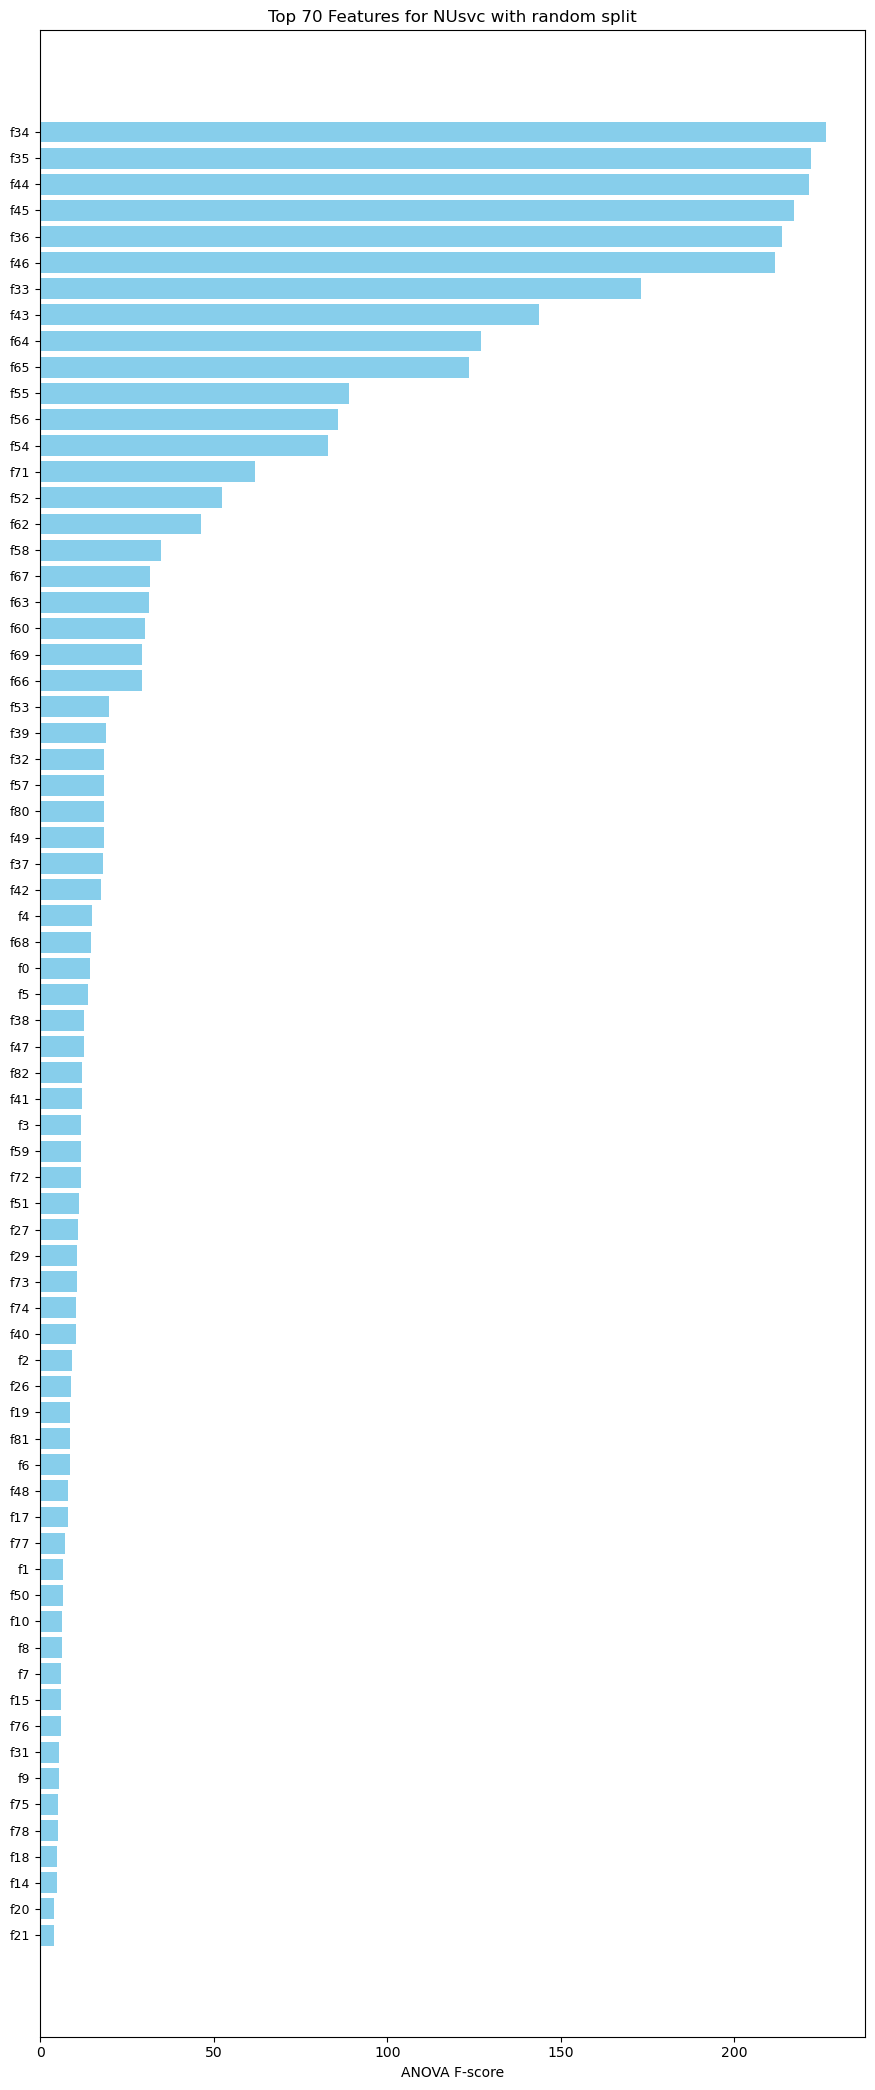

In [39]:
#Best features for NUsvc regression with 80-20 random split
import matplotlib.pyplot as plt
import pandas as pd

feature_names = X_train.columns

selector = grid_search.best_estimator_.named_steps['feature_selection']
support_mask = selector.get_support()
scores = selector.scores_

selected_features = feature_names[support_mask]
selected_scores = scores[support_mask]

sorted_idx = selected_scores.argsort()[::-1]
sorted_features = selected_features[sorted_idx]
sorted_scores = selected_scores[sorted_idx]

k = grid_search.best_params_['feature_selection__k']

print(f"\nTop {k} features and their ANOVA F-scores:")
for name, score in zip(sorted_features[:k], sorted_scores[:k]):
    print(f"{name}: {score:.4f}")

plt.figure(figsize=(12, max(6, k * 0.3)))
plt.barh(sorted_features[:k][::-1], sorted_scores[:k][::-1], color='skyblue')
plt.xlabel('ANOVA F-score')
plt.title(f'Top {k} Features for NUsvc with random split')
plt.tight_layout()
plt.subplots_adjust(left=0.3)
plt.yticks(fontsize=9)

plt.savefig(r'C:\Users\david\OneDrive\Documenti\Tesi_BehavBio\Programs\Programs\Machine_Learning\Machine_Learning_results\Best_Features\nusvc_rs.png')  
plt.show()


In [40]:
#Pipeline using random forest as classifier and random split(80-20) with stratification and feature selection

from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('inputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('rf', RandomForestClassifier(random_state = 0))
])

param_grid = {
    'scaler': [MinMaxScaler(), StandardScaler()],
    'feature_selection__k': [30, 40, 50, 60, 70],
    'rf__n_estimators': [20, 30, 50, 100, 200],
    #Number of features considered at each step. sqrt mean the sqrt of n_features
    'rf__max_features': ['sqrt'],
    'rf__max_depth':  [5, 10, 20, 30]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

best_scaler = grid_search.best_estimator_.named_steps['scaler']
print("Best scaler:", best_scaler)

print("Train set accuracy:", grid_search.best_estimator_.score(X_train, y_train))
print("Test set accuracy:", grid_search.best_estimator_.score(X_test, y_test))


C:\Users\david\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best params: {'feature_selection__k': 70, 'rf__max_depth': 30, 'rf__max_features': 'sqrt', 'rf__n_estimators': 200, 'scaler': StandardScaler()}
Best cross-validation accuracy: 0.7721088134794393
Best scaler: StandardScaler()
Train set accuracy: 1.0
Test set accuracy: 0.7917570498915402



Top 70 features and their ANOVA F-scores:
f34: 226.3805
f35: 221.9699
f44: 221.6170
f45: 217.2250
f36: 213.7271
f46: 211.5785
f33: 173.0353
f43: 143.7139
f64: 126.8569
f65: 123.4011
f55: 89.1035
f56: 85.8270
f54: 82.9017
f71: 61.8832
f52: 52.5152
f62: 46.2212
f58: 34.6844
f67: 31.7058
f63: 31.3373
f60: 30.2180
f69: 29.4279
f66: 29.3897
f53: 19.8119
f39: 18.9458
f32: 18.4912
f57: 18.3961
f80: 18.3449
f49: 18.2609
f37: 17.9848
f42: 17.5379
f4: 15.0130
f68: 14.7682
f0: 14.3618
f5: 13.7388
f38: 12.6466
f47: 12.6314
f82: 12.0490
f41: 11.9638
f3: 11.8775
f59: 11.7336
f72: 11.6974
f51: 11.0834
f27: 10.8150
f29: 10.6345
f73: 10.6095
f74: 10.4148
f40: 10.2646
f2: 9.1475
f26: 8.9713
f19: 8.5734
f81: 8.5667
f6: 8.5178
f48: 8.0710
f17: 8.0164
f77: 7.1112
f1: 6.6953
f50: 6.6838
f10: 6.3662
f8: 6.3571
f7: 6.1060
f15: 5.8576
f76: 5.8426
f31: 5.3916
f9: 5.3112
f75: 5.1991
f78: 5.1833
f18: 4.9678
f14: 4.7723
f20: 4.0242
f21: 3.9966


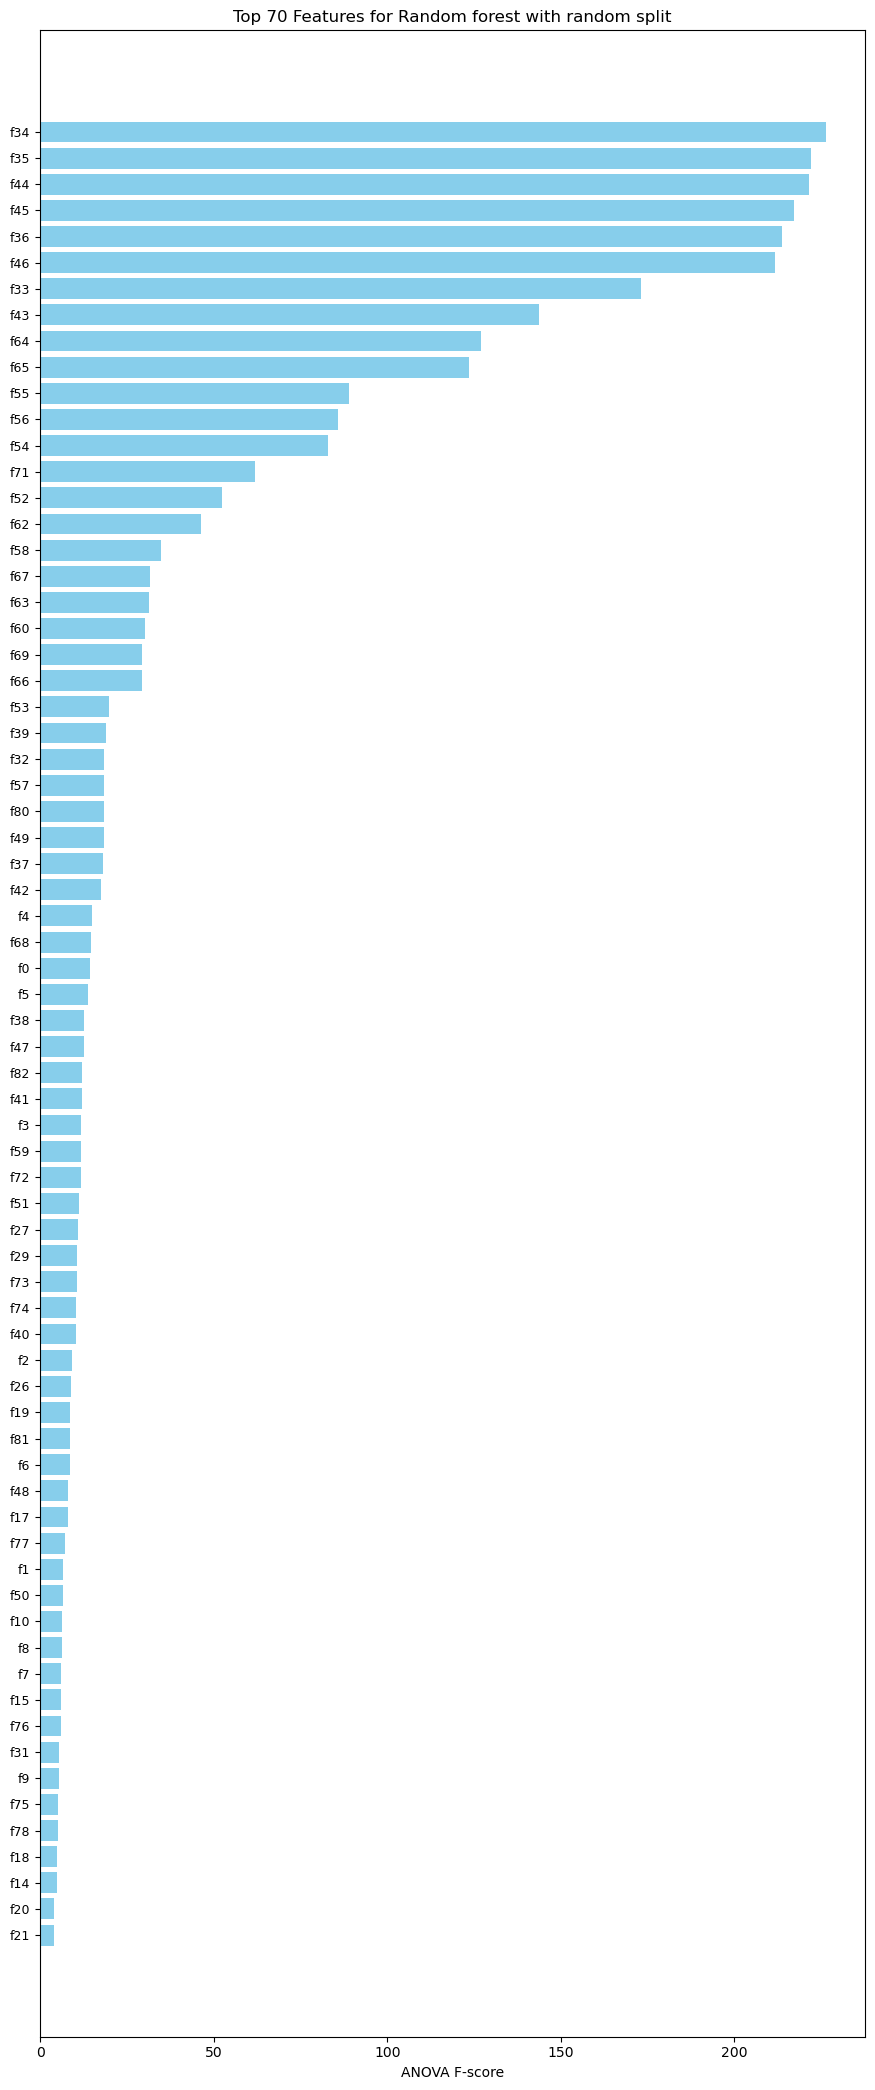

In [41]:
#Best features for Random forest regression with 80-20 random split
import matplotlib.pyplot as plt
import pandas as pd

feature_names = X_train.columns

selector = grid_search.best_estimator_.named_steps['feature_selection']
support_mask = selector.get_support()
scores = selector.scores_

selected_features = feature_names[support_mask]
selected_scores = scores[support_mask]

sorted_idx = selected_scores.argsort()[::-1]
sorted_features = selected_features[sorted_idx]
sorted_scores = selected_scores[sorted_idx]

k = grid_search.best_params_['feature_selection__k']

print(f"\nTop {k} features and their ANOVA F-scores:")
for name, score in zip(sorted_features[:k], sorted_scores[:k]):
    print(f"{name}: {score:.4f}")

plt.figure(figsize=(12, max(6, k * 0.3)))
plt.barh(sorted_features[:k][::-1], sorted_scores[:k][::-1], color='skyblue')
plt.xlabel('ANOVA F-score')
plt.title(f'Top {k} Features for Random forest with random split')
plt.tight_layout()
plt.subplots_adjust(left=0.3)
plt.yticks(fontsize=9)

plt.savefig(r'C:\Users\david\OneDrive\Documenti\Tesi_BehavBio\Programs\Programs\Machine_Learning\Machine_Learning_results\Best_Features\randomForest_rs.png')  
plt.show()


In [43]:
#Pipeline using SVC as classifier and random split(80-20) with stratification

from sklearn.svm import SVC

pipeline = Pipeline([
    ('inputer', SimpleImputer(strategy='mean')),
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('scaler', MinMaxScaler()),
    ('svc', SVC())
])

param_grid = {
    'scaler': [MinMaxScaler(), StandardScaler()],
    'feature_selection__k': [30, 40, 50, 60, 70],
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__kernel':  ['rbf', 'poly']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

best_scaler = grid_search.best_estimator_.named_steps['scaler']
print("Best scaler:", best_scaler)

print("Train set accuracy:", grid_search.best_estimator_.score(X_train, y_train))
print("Test set accuracy:", grid_search.best_estimator_.score(X_test, y_test))


Best params: {'feature_selection__k': 70, 'scaler': StandardScaler(), 'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Best cross-validation accuracy: 0.7818604925179686
Best scaler: StandardScaler()
Train set accuracy: 0.9929462832338578
Test set accuracy: 0.806941431670282



Top 70 features and their ANOVA F-scores:
f34: 226.3805
f35: 221.9699
f44: 221.6170
f45: 217.2250
f36: 213.7271
f46: 211.5785
f33: 173.0353
f43: 143.7139
f64: 126.8569
f65: 123.4011
f55: 89.1035
f56: 85.8270
f54: 82.9017
f71: 61.8832
f52: 52.5152
f62: 46.2212
f58: 34.6844
f67: 31.7058
f63: 31.3373
f60: 30.2180
f69: 29.4279
f66: 29.3897
f53: 19.8119
f39: 18.9458
f32: 18.4912
f57: 18.3961
f80: 18.3449
f49: 18.2609
f37: 17.9848
f42: 17.5379
f4: 15.0130
f68: 14.7682
f0: 14.3618
f5: 13.7388
f38: 12.6466
f47: 12.6314
f82: 12.0490
f41: 11.9638
f3: 11.8775
f59: 11.7336
f72: 11.6974
f51: 11.0834
f27: 10.8150
f29: 10.6345
f73: 10.6095
f74: 10.4148
f40: 10.2646
f2: 9.1475
f26: 8.9713
f19: 8.5734
f81: 8.5667
f6: 8.5178
f48: 8.0710
f17: 8.0164
f77: 7.1112
f1: 6.6953
f50: 6.6838
f10: 6.3662
f8: 6.3571
f7: 6.1060
f15: 5.8576
f76: 5.8426
f31: 5.3916
f9: 5.3112
f75: 5.1991
f78: 5.1833
f18: 4.9678
f14: 4.7723
f20: 4.0242
f21: 3.9966


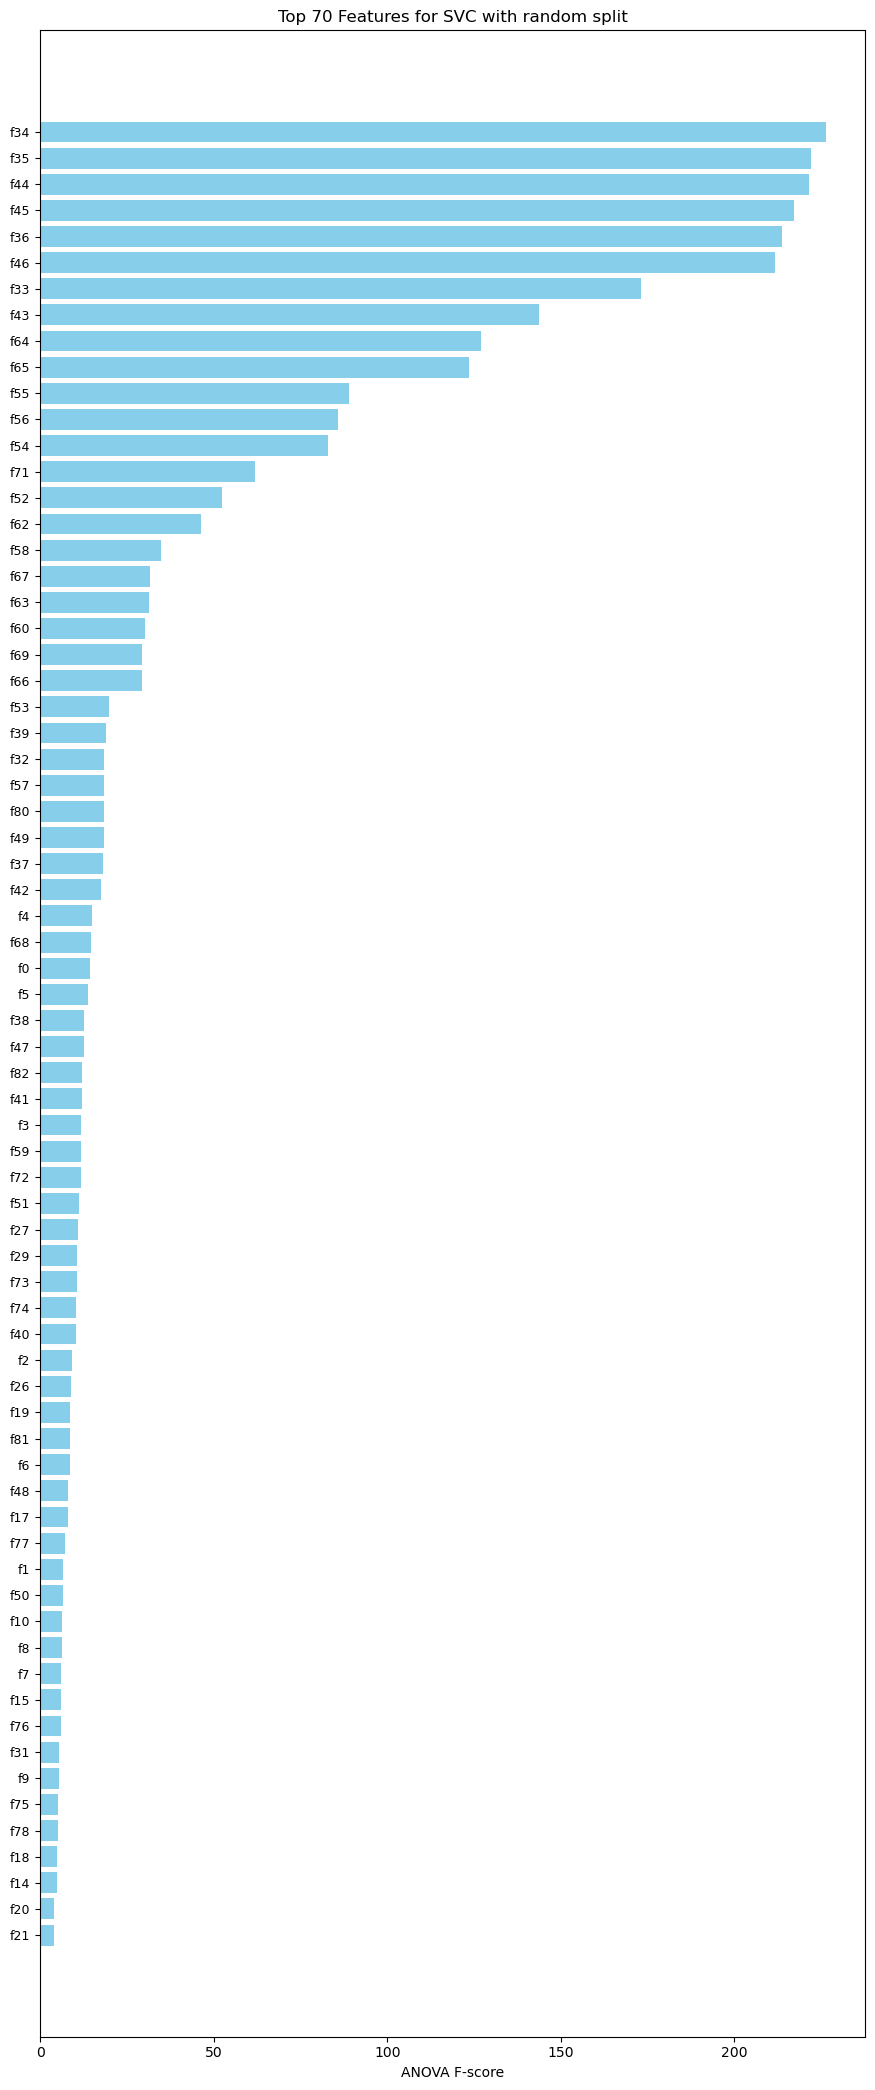

In [44]:
#Best features for SVC regression with 80-20 random split
import matplotlib.pyplot as plt
import pandas as pd

feature_names = X_train.columns

selector = grid_search.best_estimator_.named_steps['feature_selection']
support_mask = selector.get_support()
scores = selector.scores_

selected_features = feature_names[support_mask]
selected_scores = scores[support_mask]

sorted_idx = selected_scores.argsort()[::-1]
sorted_features = selected_features[sorted_idx]
sorted_scores = selected_scores[sorted_idx]

k = grid_search.best_params_['feature_selection__k']

print(f"\nTop {k} features and their ANOVA F-scores:")
for name, score in zip(sorted_features[:k], sorted_scores[:k]):
    print(f"{name}: {score:.4f}")

plt.figure(figsize=(12, max(6, k * 0.3)))
plt.barh(sorted_features[:k][::-1], sorted_scores[:k][::-1], color='skyblue')
plt.xlabel('ANOVA F-score')
plt.title(f'Top {k} Features for SVC with random split')
plt.tight_layout()
plt.subplots_adjust(left=0.3)
plt.yticks(fontsize=9)

plt.savefig(r'C:\Users\david\OneDrive\Documenti\Tesi_BehavBio\Programs\Programs\Machine_Learning\Machine_Learning_results\Best_Features\svc_rs.png')  
plt.show()


In [4]:
#Split the dataset into train and test set.
#This time I used S1 and S2 as train and s3 as test.

#Extract the tester number from file key
dataset['tester_id'] = dataset['file_key'].apply(lambda x: x.split('_')[0])

#Extract the session number from file key
dataset['session_id'] = dataset['file_key'].apply(lambda x: x.split('_')[1])

#isin is a pandas method used to filter row with a certain value
train_subset = dataset[dataset['session_id'].isin(['S1', 'S2'])]
test_subset = dataset[dataset['session_id'] == 'S3']

X_train = train_subset.loc[:, 'f0':'f82']
y_train = train_subset['tester_id']

X_test = test_subset.loc[:, 'f0':'f82']
y_test = test_subset['tester_id']


In [5]:
#Pipeline using naivy bayes as classifier with session split and feature selection

from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif

pipeline = Pipeline([
    ('inputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('nb', GaussianNB())
])

param_grid = {
    'scaler': [MinMaxScaler(), StandardScaler()],
    'feature_selection__k': [30, 40, 50, 60, 70]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)

best_k = grid_search.best_params_['feature_selection__k']
print("Best number of features selected (k):", best_k)

print("Best cross-validation accuracy:", grid_search.best_score_)

best_scaler = grid_search.best_estimator_.named_steps['scaler']
print("Best scaler:", best_scaler)


print("Train set accuracy:", grid_search.best_estimator_.score(X_train, y_train))
print("Test set accuracy:", grid_search.best_estimator_.score(X_test, y_test))


Best params: {'feature_selection__k': 70, 'scaler': MinMaxScaler()}
Best number of features selected (k): 70
Best cross-validation accuracy: 0.5846672871102839
Best scaler: MinMaxScaler()
Train set accuracy: 0.7044270833333334
Test set accuracy: 0.5716145833333334



Top 70 features and their ANOVA F-scores:
f34: 167.8624
f44: 166.3225
f35: 165.2633
f45: 162.8132
f36: 161.8959
f46: 160.8461
f33: 146.6197
f64: 107.5738
f65: 105.5243
f43: 102.7904
f56: 81.1379
f55: 80.2987
f54: 73.7116
f52: 44.6198
f71: 43.6948
f62: 38.7267
f60: 28.6663
f58: 28.0386
f63: 25.0596
f69: 24.3468
f67: 23.5256
f66: 22.3516
f39: 17.0268
f53: 16.1725
f57: 15.1529
f49: 15.0909
f37: 14.8403
f80: 14.2547
f32: 13.5353
f68: 13.4310
f42: 13.3076
f76: 13.3031
f4: 12.2380
f5: 11.5336
f0: 11.2888
f38: 10.7233
f75: 10.5528
f29: 10.5235
f41: 10.3664
f59: 10.3225
f47: 10.2927
f27: 9.9014
f51: 9.6850
f3: 9.4940
f72: 9.3485
f40: 9.2607
f82: 9.1142
f26: 8.8887
f73: 8.8096
f74: 7.8476
f19: 7.7455
f2: 7.4425
f17: 7.2260
f6: 6.7365
f12: 6.6332
f81: 6.4588
f77: 6.1507
f48: 6.1319
f1: 5.6110
f31: 5.5411
f8: 5.5411
f7: 5.3966
f10: 5.3326
f50: 5.3143
f15: 5.0679
f16: 4.7685
f78: 4.3991
f13: 4.3446
f9: 4.3129
f22: 4.1062


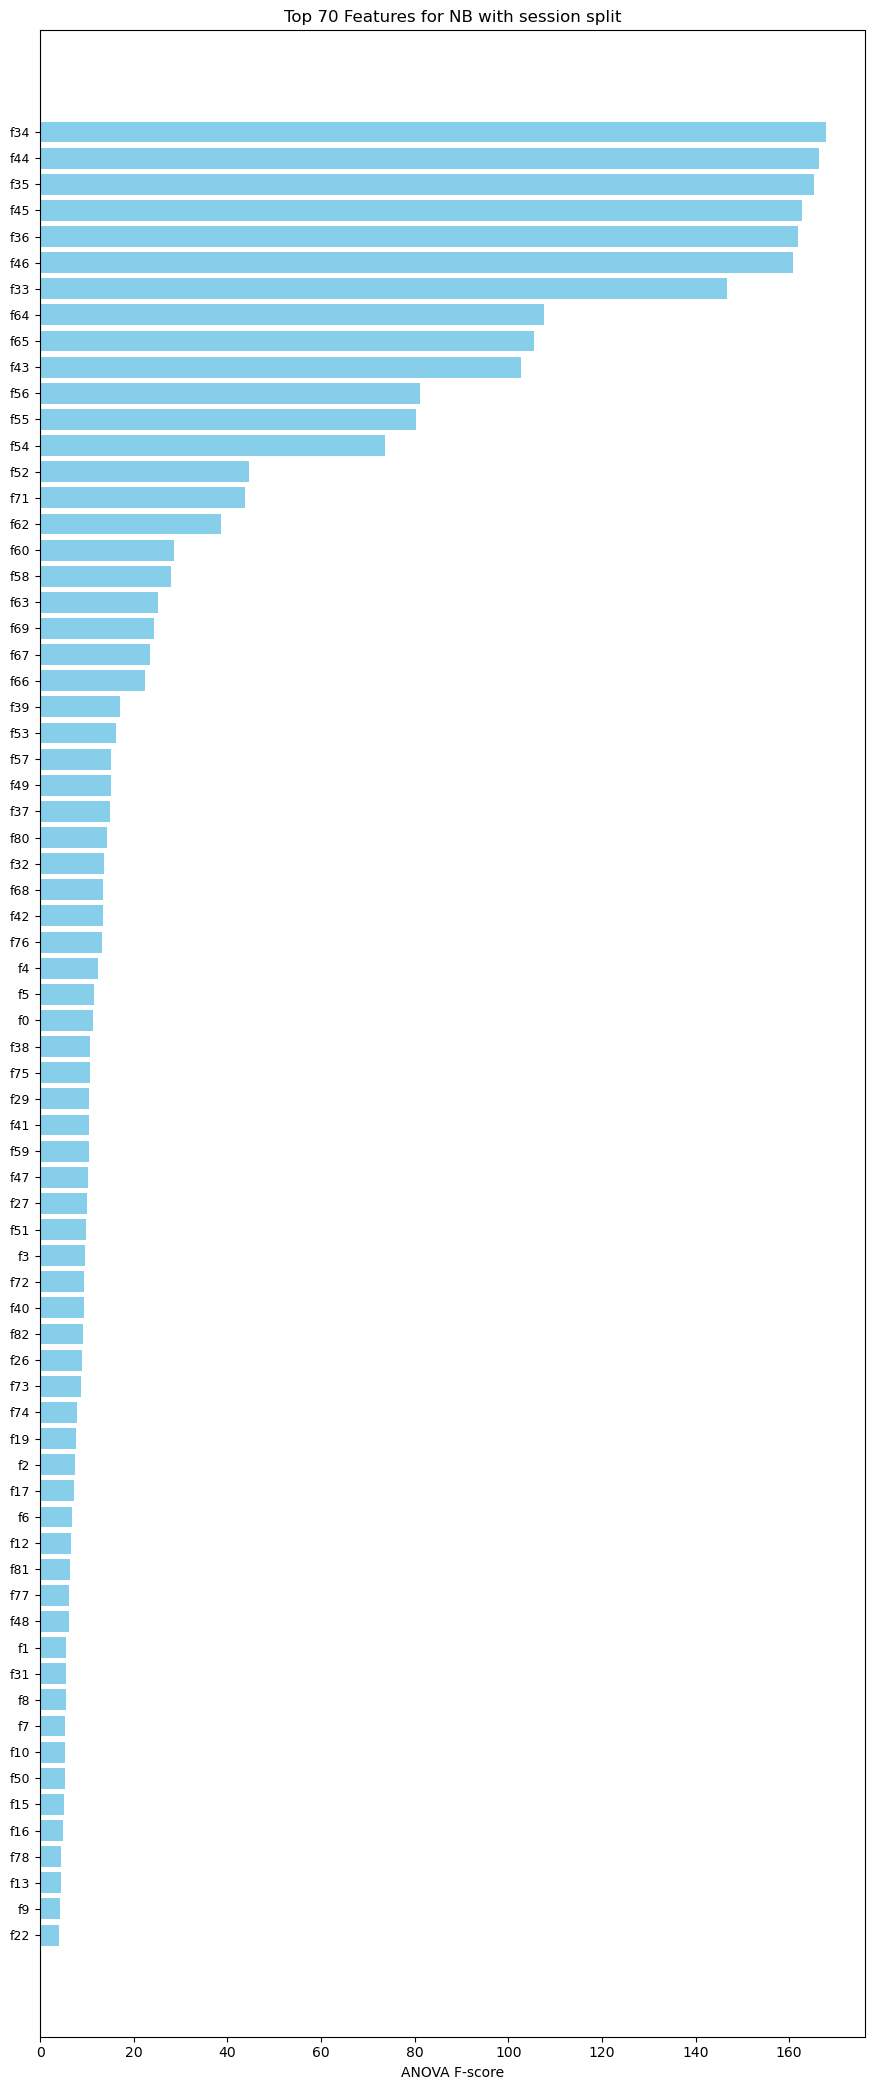

In [6]:
#Best features for naivy bayes with session split
import matplotlib.pyplot as plt
import pandas as pd

feature_names = X_train.columns

selector = grid_search.best_estimator_.named_steps['feature_selection']
support_mask = selector.get_support()
scores = selector.scores_

selected_features = feature_names[support_mask]
selected_scores = scores[support_mask]

sorted_idx = selected_scores.argsort()[::-1]
sorted_features = selected_features[sorted_idx]
sorted_scores = selected_scores[sorted_idx]

k = grid_search.best_params_['feature_selection__k']

print(f"\nTop {k} features and their ANOVA F-scores:")
for name, score in zip(sorted_features[:k], sorted_scores[:k]):
    print(f"{name}: {score:.4f}")

plt.figure(figsize=(12, max(6, k * 0.3)))
plt.barh(sorted_features[:k][::-1], sorted_scores[:k][::-1], color='skyblue')
plt.xlabel('ANOVA F-score')
plt.title(f'Top {k} Features for NB with session split')
plt.tight_layout()
plt.subplots_adjust(left=0.3)
plt.yticks(fontsize=9)

plt.savefig(r'C:\Users\david\OneDrive\Documenti\Tesi_BehavBio\Programs\Programs\Machine_Learning\Machine_Learning_results\Best_Features\nb_ss.png')
plt.show()


In [7]:
#Pipeline using knn as classifier and and S1, S2 as train and S3 and feature selection

from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    #Fill the Nan with the mean on the dataset of that value
    ('imputer', SimpleImputer(strategy='mean')),
    #It is simply a placeholder
    ('scaler', MinMaxScaler()), 
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    #MinMax and Standard scaler
    'scaler': [MinMaxScaler(), StandardScaler()],
    'feature_selection__k': [30, 40, 50, 60, 70],
    #Number of neighbors
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    #weight that each neighbour have on the voting process
    #Uniform = everybody have the same weight
    #Distance = Neighbors are weighted by the inverse of their distance 
    'knn__weights': ['uniform', 'distance'],
    #Distance metric used
    'knn__metric': ['minkowski', 'euclidean', 'manhattan'],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)

best_k = grid_search.best_params_['feature_selection__k']
print("Best number of features selected (k):", best_k)

print("Best cross-validation accuracy:", grid_search.best_score_)

best_scaler = grid_search.best_estimator_.named_steps['scaler']
print("Best scaler:", best_scaler)

print("Train set accuracy:", grid_search.best_estimator_.score(X_train, y_train))
print("Test set accuracy:", grid_search.best_estimator_.score(X_test, y_test))

Best params: {'feature_selection__k': 70, 'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'distance', 'scaler': StandardScaler()}
Best number of features selected (k): 70
Best cross-validation accuracy: 0.688865857269766
Best scaler: StandardScaler()
Train set accuracy: 1.0
Test set accuracy: 0.64453125



Top 70 features and their ANOVA F-scores:
f34: 167.8624
f44: 166.3225
f35: 165.2633
f45: 162.8132
f36: 161.8959
f46: 160.8461
f33: 146.6197
f64: 107.5738
f65: 105.5243
f43: 102.7904
f56: 81.1379
f55: 80.2987
f54: 73.7116
f52: 44.6198
f71: 43.6948
f62: 38.7267
f60: 28.6663
f58: 28.0386
f63: 25.0596
f69: 24.3468
f67: 23.5256
f66: 22.3516
f39: 17.0268
f53: 16.1725
f57: 15.1529
f49: 15.0909
f37: 14.8403
f80: 14.2547
f32: 13.5353
f68: 13.4310
f42: 13.3076
f76: 13.3031
f4: 12.2380
f5: 11.5336
f0: 11.2888
f38: 10.7233
f75: 10.5528
f29: 10.5235
f41: 10.3664
f59: 10.3225
f47: 10.2927
f27: 9.9014
f51: 9.6850
f3: 9.4940
f72: 9.3485
f40: 9.2607
f82: 9.1142
f26: 8.8887
f73: 8.8096
f74: 7.8476
f19: 7.7455
f2: 7.4425
f17: 7.2260
f6: 6.7365
f12: 6.6332
f81: 6.4588
f77: 6.1507
f48: 6.1319
f1: 5.6110
f31: 5.5411
f8: 5.5411
f7: 5.3966
f10: 5.3326
f50: 5.3143
f15: 5.0679
f16: 4.7685
f78: 4.3991
f13: 4.3446
f9: 4.3129
f22: 4.1062


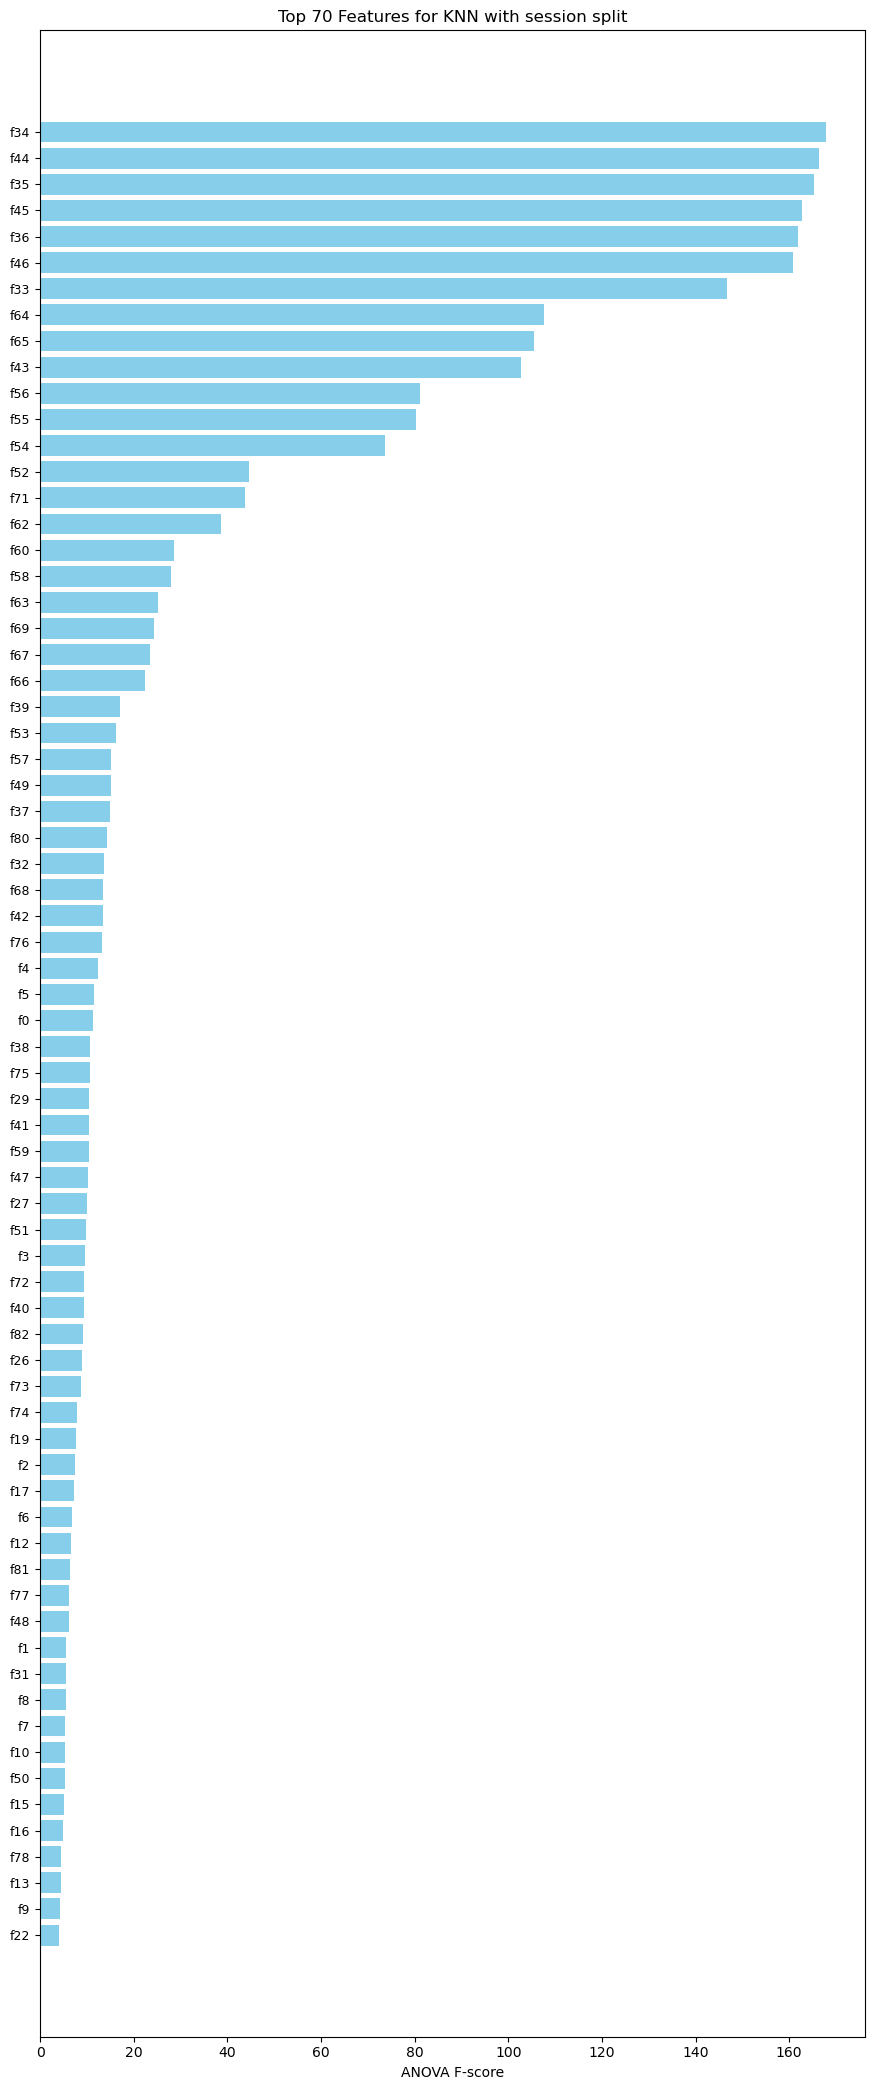

In [8]:
#Best features for knn with S1, S2 as train and S3 as test set
import matplotlib.pyplot as plt
import pandas as pd

feature_names = X_train.columns

selector = grid_search.best_estimator_.named_steps['feature_selection']
support_mask = selector.get_support()
scores = selector.scores_

selected_features = feature_names[support_mask]
selected_scores = scores[support_mask]

sorted_idx = selected_scores.argsort()[::-1]
sorted_features = selected_features[sorted_idx]
sorted_scores = selected_scores[sorted_idx]

k = grid_search.best_params_['feature_selection__k']

print(f"\nTop {k} features and their ANOVA F-scores:")
for name, score in zip(sorted_features[:k], sorted_scores[:k]):
    print(f"{name}: {score:.4f}")

plt.figure(figsize=(12, max(6, k * 0.3)))
plt.barh(sorted_features[:k][::-1], sorted_scores[:k][::-1], color='skyblue')
plt.xlabel('ANOVA F-score')
plt.title(f'Top {k} Features for KNN with session split')
plt.tight_layout()
plt.subplots_adjust(left=0.3)
plt.yticks(fontsize=9)

plt.savefig(r'C:\Users\david\OneDrive\Documenti\Tesi_BehavBio\Programs\Programs\Machine_Learning\Machine_Learning_results\Best_Features\knn_ss.png')  


In [9]:
#Pipeline using logistic regression as classifier with session split and feature selection

from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('inputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('logreg', LogisticRegression(max_iter = 1000, random_state = 0))
])

param_grid = {
    'scaler': [MinMaxScaler(), StandardScaler()],
    'feature_selection__k': [30, 40, 50, 60, 70],
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

best_scaler = grid_search.best_estimator_.named_steps['scaler']
print("Best scaler:", best_scaler)

print("Train set accuracy:", grid_search.best_estimator_.score(X_train, y_train))
print("Test set accuracy:", grid_search.best_estimator_.score(X_test, y_test))


Best params: {'feature_selection__k': 70, 'logreg__C': 1, 'scaler': StandardScaler()}
Best cross-validation accuracy: 0.6764774313634248
Best scaler: StandardScaler()
Train set accuracy: 0.919921875
Test set accuracy: 0.6783854166666666



Top 70 features and their ANOVA F-scores:
f34: 167.8624
f44: 166.3225
f35: 165.2633
f45: 162.8132
f36: 161.8959
f46: 160.8461
f33: 146.6197
f64: 107.5738
f65: 105.5243
f43: 102.7904
f56: 81.1379
f55: 80.2987
f54: 73.7116
f52: 44.6198
f71: 43.6948
f62: 38.7267
f60: 28.6663
f58: 28.0386
f63: 25.0596
f69: 24.3468
f67: 23.5256
f66: 22.3516
f39: 17.0268
f53: 16.1725
f57: 15.1529
f49: 15.0909
f37: 14.8403
f80: 14.2547
f32: 13.5353
f68: 13.4310
f42: 13.3076
f76: 13.3031
f4: 12.2380
f5: 11.5336
f0: 11.2888
f38: 10.7233
f75: 10.5528
f29: 10.5235
f41: 10.3664
f59: 10.3225
f47: 10.2927
f27: 9.9014
f51: 9.6850
f3: 9.4940
f72: 9.3485
f40: 9.2607
f82: 9.1142
f26: 8.8887
f73: 8.8096
f74: 7.8476
f19: 7.7455
f2: 7.4425
f17: 7.2260
f6: 6.7365
f12: 6.6332
f81: 6.4588
f77: 6.1507
f48: 6.1319
f1: 5.6110
f31: 5.5411
f8: 5.5411
f7: 5.3966
f10: 5.3326
f50: 5.3143
f15: 5.0679
f16: 4.7685
f78: 4.3991
f13: 4.3446
f9: 4.3129
f22: 4.1062


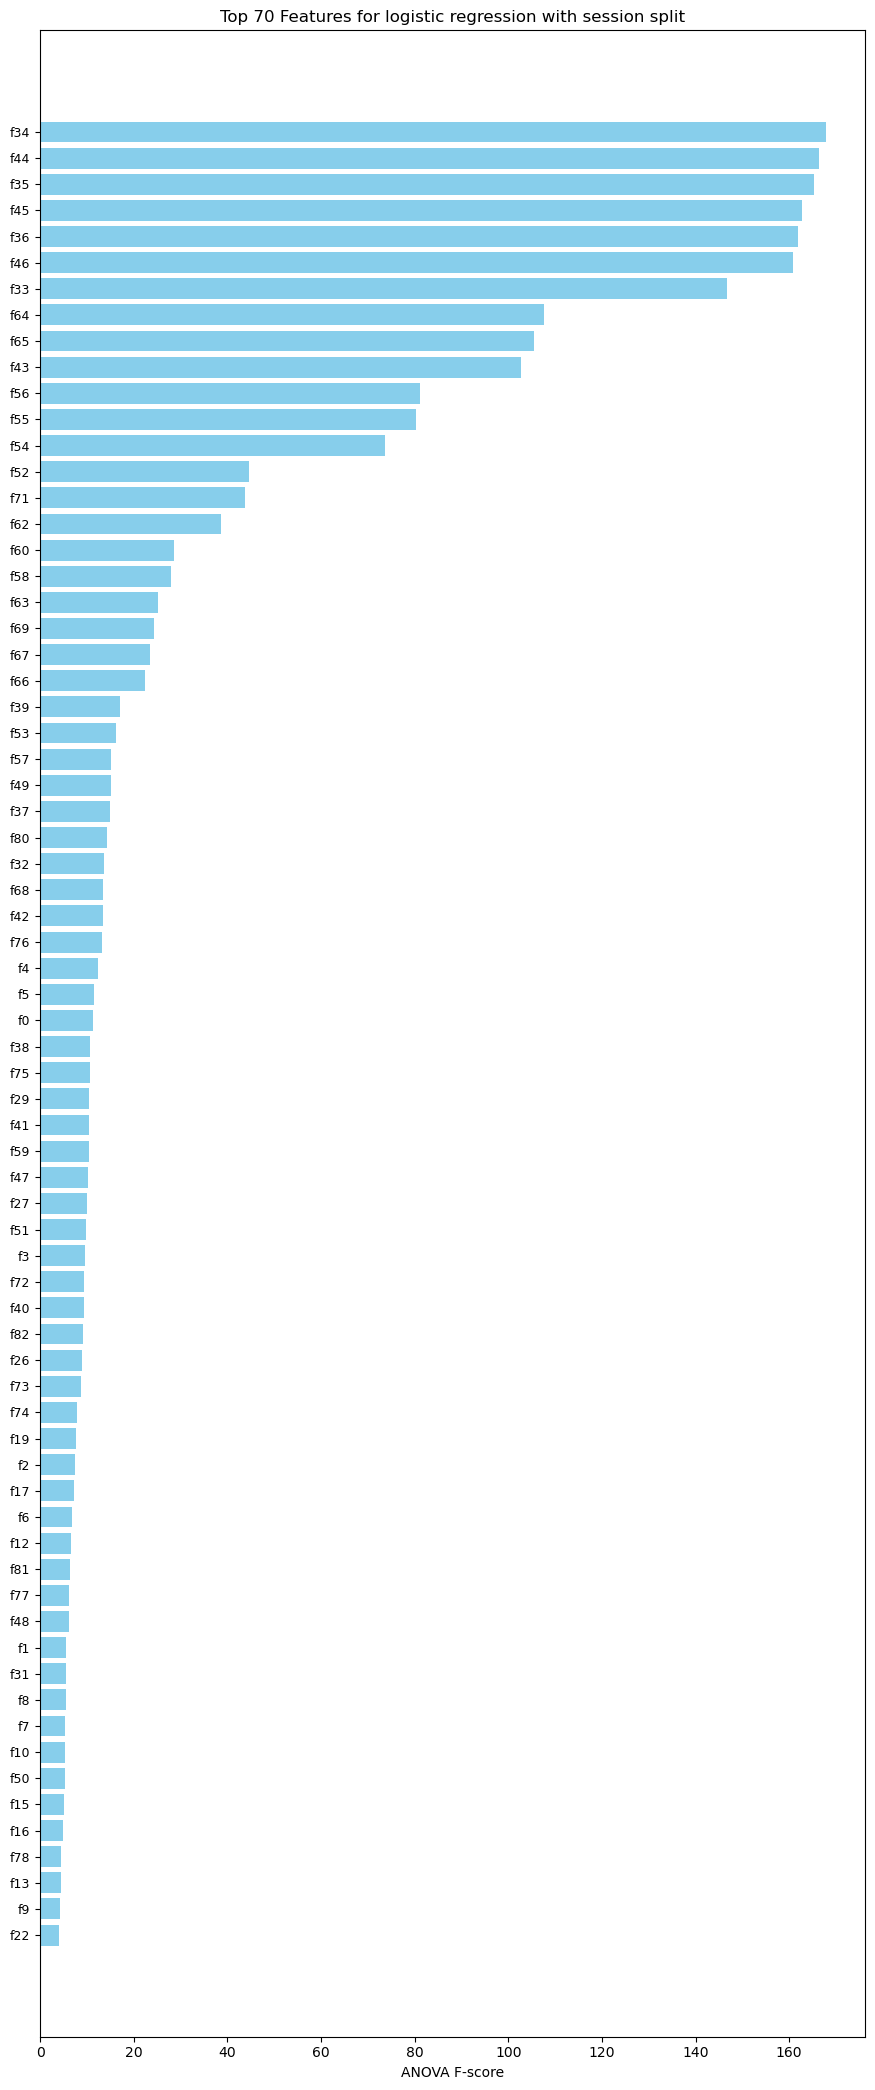

In [10]:
#Best features for logistic regression with session split
import matplotlib.pyplot as plt
import pandas as pd

feature_names = X_train.columns

selector = grid_search.best_estimator_.named_steps['feature_selection']
support_mask = selector.get_support()
scores = selector.scores_

selected_features = feature_names[support_mask]
selected_scores = scores[support_mask]

sorted_idx = selected_scores.argsort()[::-1]
sorted_features = selected_features[sorted_idx]
sorted_scores = selected_scores[sorted_idx]

k = grid_search.best_params_['feature_selection__k']

print(f"\nTop {k} features and their ANOVA F-scores:")
for name, score in zip(sorted_features[:k], sorted_scores[:k]):
    print(f"{name}: {score:.4f}")

plt.figure(figsize=(12, max(6, k * 0.3)))
plt.barh(sorted_features[:k][::-1], sorted_scores[:k][::-1], color='skyblue')
plt.xlabel('ANOVA F-score')
plt.title(f'Top {k} Features for logistic regression with session split')
plt.tight_layout()
plt.subplots_adjust(left=0.3)
plt.yticks(fontsize=9)

plt.savefig(r'C:\Users\david\OneDrive\Documenti\Tesi_BehavBio\Programs\Programs\Machine_Learning\Machine_Learning_results\Best_Features\logreg_ss.png')  
plt.show()


In [11]:
#Pipeline using NUsvc as classifier with session split and feature selection

from sklearn.svm import NuSVC

pipeline = Pipeline([
    ('inputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),  # Placeholder; to be searched
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('svc', NuSVC())  # Replace rf with NuSVC
])

param_grid = {
    'scaler': [MinMaxScaler(), StandardScaler()],
    'feature_selection__k': [30, 40, 50, 60, 70],
    'svc__nu': [0.25, 0.5, 0.75],  
    'svc__kernel': ['rbf', 'poly', 'sigmoid'],
    'svc__gamma': ['scale', 'auto']
}

# Grid search with 5-fold CV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Output best parameters and scores
print("Best params:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Get best scaler
best_scaler = grid_search.best_estimator_.named_steps['scaler']
print("Best scaler:", best_scaler)

# Train/test accuracy
print("Train set accuracy:", grid_search.best_estimator_.score(X_train, y_train))
print("Test set accuracy:", grid_search.best_estimator_.score(X_test, y_test))


Best params: {'feature_selection__k': 60, 'scaler': StandardScaler(), 'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'svc__nu': 0.25}
Best cross-validation accuracy: 0.7428740640467024
Best scaler: StandardScaler()
Train set accuracy: 0.97265625
Test set accuracy: 0.6979166666666666



Top 60 features and their ANOVA F-scores:
f34: 167.8624
f44: 166.3225
f35: 165.2633
f45: 162.8132
f36: 161.8959
f46: 160.8461
f33: 146.6197
f64: 107.5738
f65: 105.5243
f43: 102.7904
f56: 81.1379
f55: 80.2987
f54: 73.7116
f52: 44.6198
f71: 43.6948
f62: 38.7267
f60: 28.6663
f58: 28.0386
f63: 25.0596
f69: 24.3468
f67: 23.5256
f66: 22.3516
f39: 17.0268
f53: 16.1725
f57: 15.1529
f49: 15.0909
f37: 14.8403
f80: 14.2547
f32: 13.5353
f68: 13.4310
f42: 13.3076
f76: 13.3031
f4: 12.2380
f5: 11.5336
f0: 11.2888
f38: 10.7233
f75: 10.5528
f29: 10.5235
f41: 10.3664
f59: 10.3225
f47: 10.2927
f27: 9.9014
f51: 9.6850
f3: 9.4940
f72: 9.3485
f40: 9.2607
f82: 9.1142
f26: 8.8887
f73: 8.8096
f74: 7.8476
f19: 7.7455
f2: 7.4425
f17: 7.2260
f6: 6.7365
f12: 6.6332
f81: 6.4588
f77: 6.1507
f48: 6.1319
f1: 5.6110
f31: 5.5411


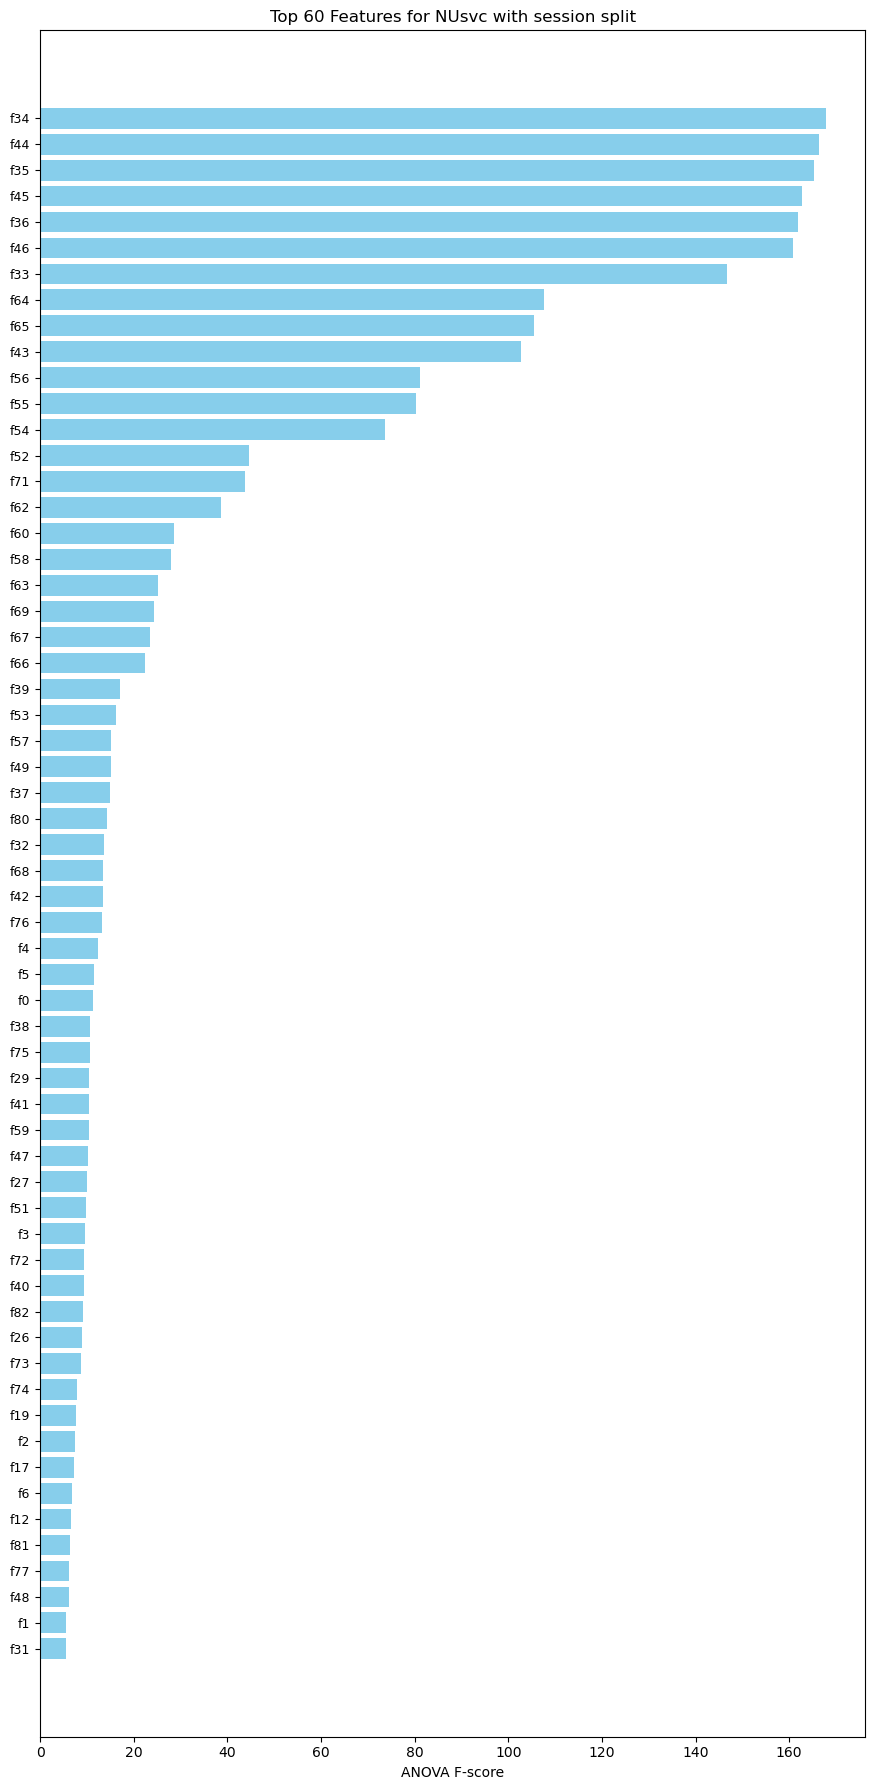

In [12]:
#Best features for NUsvc regression with session split
import matplotlib.pyplot as plt
import pandas as pd

feature_names = X_train.columns

selector = grid_search.best_estimator_.named_steps['feature_selection']
support_mask = selector.get_support()
scores = selector.scores_

selected_features = feature_names[support_mask]
selected_scores = scores[support_mask]

sorted_idx = selected_scores.argsort()[::-1]
sorted_features = selected_features[sorted_idx]
sorted_scores = selected_scores[sorted_idx]

k = grid_search.best_params_['feature_selection__k']

print(f"\nTop {k} features and their ANOVA F-scores:")
for name, score in zip(sorted_features[:k], sorted_scores[:k]):
    print(f"{name}: {score:.4f}")

plt.figure(figsize=(12, max(6, k * 0.3)))
plt.barh(sorted_features[:k][::-1], sorted_scores[:k][::-1], color='skyblue')
plt.xlabel('ANOVA F-score')
plt.title(f'Top {k} Features for NUsvc with session split')
plt.tight_layout()
plt.subplots_adjust(left=0.3)
plt.yticks(fontsize=9)

plt.savefig(r'C:\Users\david\OneDrive\Documenti\Tesi_BehavBio\Programs\Programs\Machine_Learning\Machine_Learning_results\Best_Features\nusvc_ss.png')  
plt.show()


In [13]:
#Pipeline using random forest as classifier with session split and feature selection

from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('inputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('rf', RandomForestClassifier(random_state = 0))
])

param_grid = {
    'scaler': [MinMaxScaler(), StandardScaler()],
    'feature_selection__k': [30, 40, 50, 60, 70],
    'rf__n_estimators': [20, 30, 50, 100, 200],
    #Number of features considered at each step. sqrt mean the sqrt of n_features
    'rf__max_features': ['sqrt'],
    'rf__max_depth':  [5, 10, 20, 30]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

best_scaler = grid_search.best_estimator_.named_steps['scaler']
print("Best scaler:", best_scaler)

print("Train set accuracy:", grid_search.best_estimator_.score(X_train, y_train))
print("Test set accuracy:", grid_search.best_estimator_.score(X_test, y_test))


C:\Users\david\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best params: {'feature_selection__k': 70, 'rf__max_depth': 20, 'rf__max_features': 'sqrt', 'rf__n_estimators': 200, 'scaler': MinMaxScaler()}
Best cross-validation accuracy: 0.7318393333051313
Best scaler: MinMaxScaler()
Train set accuracy: 1.0
Test set accuracy: 0.6432291666666666



Top 70 features and their ANOVA F-scores:
f34: 167.8624
f44: 166.3225
f35: 165.2633
f45: 162.8132
f36: 161.8959
f46: 160.8461
f33: 146.6197
f64: 107.5738
f65: 105.5243
f43: 102.7904
f56: 81.1379
f55: 80.2987
f54: 73.7116
f52: 44.6198
f71: 43.6948
f62: 38.7267
f60: 28.6663
f58: 28.0386
f63: 25.0596
f69: 24.3468
f67: 23.5256
f66: 22.3516
f39: 17.0268
f53: 16.1725
f57: 15.1529
f49: 15.0909
f37: 14.8403
f80: 14.2547
f32: 13.5353
f68: 13.4310
f42: 13.3076
f76: 13.3031
f4: 12.2380
f5: 11.5336
f0: 11.2888
f38: 10.7233
f75: 10.5528
f29: 10.5235
f41: 10.3664
f59: 10.3225
f47: 10.2927
f27: 9.9014
f51: 9.6850
f3: 9.4940
f72: 9.3485
f40: 9.2607
f82: 9.1142
f26: 8.8887
f73: 8.8096
f74: 7.8476
f19: 7.7455
f2: 7.4425
f17: 7.2260
f6: 6.7365
f12: 6.6332
f81: 6.4588
f77: 6.1507
f48: 6.1319
f1: 5.6110
f31: 5.5411
f8: 5.5411
f7: 5.3966
f10: 5.3326
f50: 5.3143
f15: 5.0679
f16: 4.7685
f78: 4.3991
f13: 4.3446
f9: 4.3129
f22: 4.1062


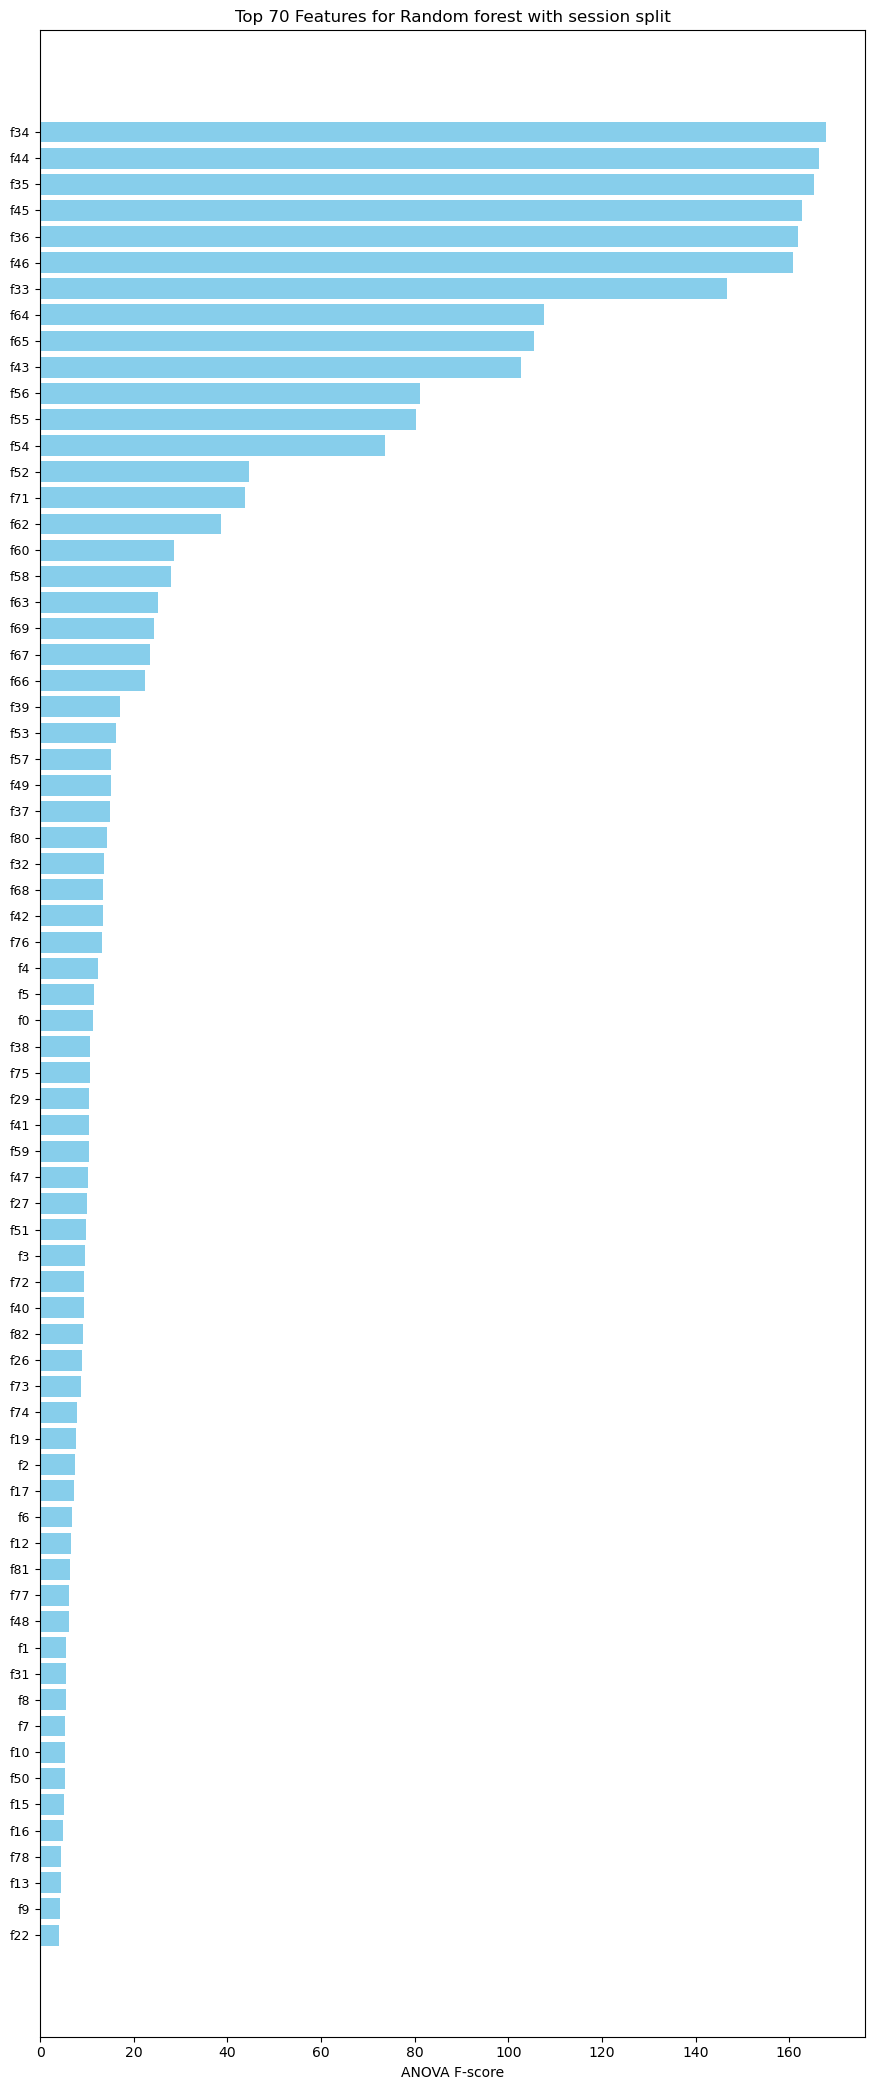

In [14]:
#Best features for Random forest regression with session split
import matplotlib.pyplot as plt
import pandas as pd

feature_names = X_train.columns

selector = grid_search.best_estimator_.named_steps['feature_selection']
support_mask = selector.get_support()
scores = selector.scores_

selected_features = feature_names[support_mask]
selected_scores = scores[support_mask]

sorted_idx = selected_scores.argsort()[::-1]
sorted_features = selected_features[sorted_idx]
sorted_scores = selected_scores[sorted_idx]

k = grid_search.best_params_['feature_selection__k']

print(f"\nTop {k} features and their ANOVA F-scores:")
for name, score in zip(sorted_features[:k], sorted_scores[:k]):
    print(f"{name}: {score:.4f}")

plt.figure(figsize=(12, max(6, k * 0.3)))
plt.barh(sorted_features[:k][::-1], sorted_scores[:k][::-1], color='skyblue')
plt.xlabel('ANOVA F-score')
plt.title(f'Top {k} Features for Random forest with session split')
plt.tight_layout()
plt.subplots_adjust(left=0.3)
plt.yticks(fontsize=9)

plt.savefig(r'C:\Users\david\OneDrive\Documenti\Tesi_BehavBio\Programs\Programs\Machine_Learning\Machine_Learning_results\Best_Features\randomForest_ss.png')  
plt.show()


In [15]:
#Pipeline using SVC as classifier with session split and feature selection

from sklearn.svm import SVC

pipeline = Pipeline([
    ('inputer', SimpleImputer(strategy='mean')),
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('scaler', MinMaxScaler()),
    ('svc', SVC())
])

param_grid = {
    'scaler': [MinMaxScaler(), StandardScaler()],
    'feature_selection__k': [30, 40, 50, 60, 70],
    'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
    'svc__kernel':  ['rbf', 'poly']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

best_scaler = grid_search.best_estimator_.named_steps['scaler']
print("Best scaler:", best_scaler)

print("Train set accuracy:", grid_search.best_estimator_.score(X_train, y_train))
print("Test set accuracy:", grid_search.best_estimator_.score(X_test, y_test))


Best params: {'feature_selection__k': 70, 'scaler': StandardScaler(), 'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Best cross-validation accuracy: 0.7500465332712889
Best scaler: StandardScaler()
Train set accuracy: 0.99609375
Test set accuracy: 0.6979166666666666



Top 70 features and their ANOVA F-scores:
f34: 167.8624
f44: 166.3225
f35: 165.2633
f45: 162.8132
f36: 161.8959
f46: 160.8461
f33: 146.6197
f64: 107.5738
f65: 105.5243
f43: 102.7904
f56: 81.1379
f55: 80.2987
f54: 73.7116
f52: 44.6198
f71: 43.6948
f62: 38.7267
f60: 28.6663
f58: 28.0386
f63: 25.0596
f69: 24.3468
f67: 23.5256
f66: 22.3516
f39: 17.0268
f53: 16.1725
f57: 15.1529
f49: 15.0909
f37: 14.8403
f80: 14.2547
f32: 13.5353
f68: 13.4310
f42: 13.3076
f76: 13.3031
f4: 12.2380
f5: 11.5336
f0: 11.2888
f38: 10.7233
f75: 10.5528
f29: 10.5235
f41: 10.3664
f59: 10.3225
f47: 10.2927
f27: 9.9014
f51: 9.6850
f3: 9.4940
f72: 9.3485
f40: 9.2607
f82: 9.1142
f26: 8.8887
f73: 8.8096
f74: 7.8476
f19: 7.7455
f2: 7.4425
f17: 7.2260
f6: 6.7365
f12: 6.6332
f81: 6.4588
f77: 6.1507
f48: 6.1319
f1: 5.6110
f31: 5.5411
f8: 5.5411
f7: 5.3966
f10: 5.3326
f50: 5.3143
f15: 5.0679
f16: 4.7685
f78: 4.3991
f13: 4.3446
f9: 4.3129
f22: 4.1062


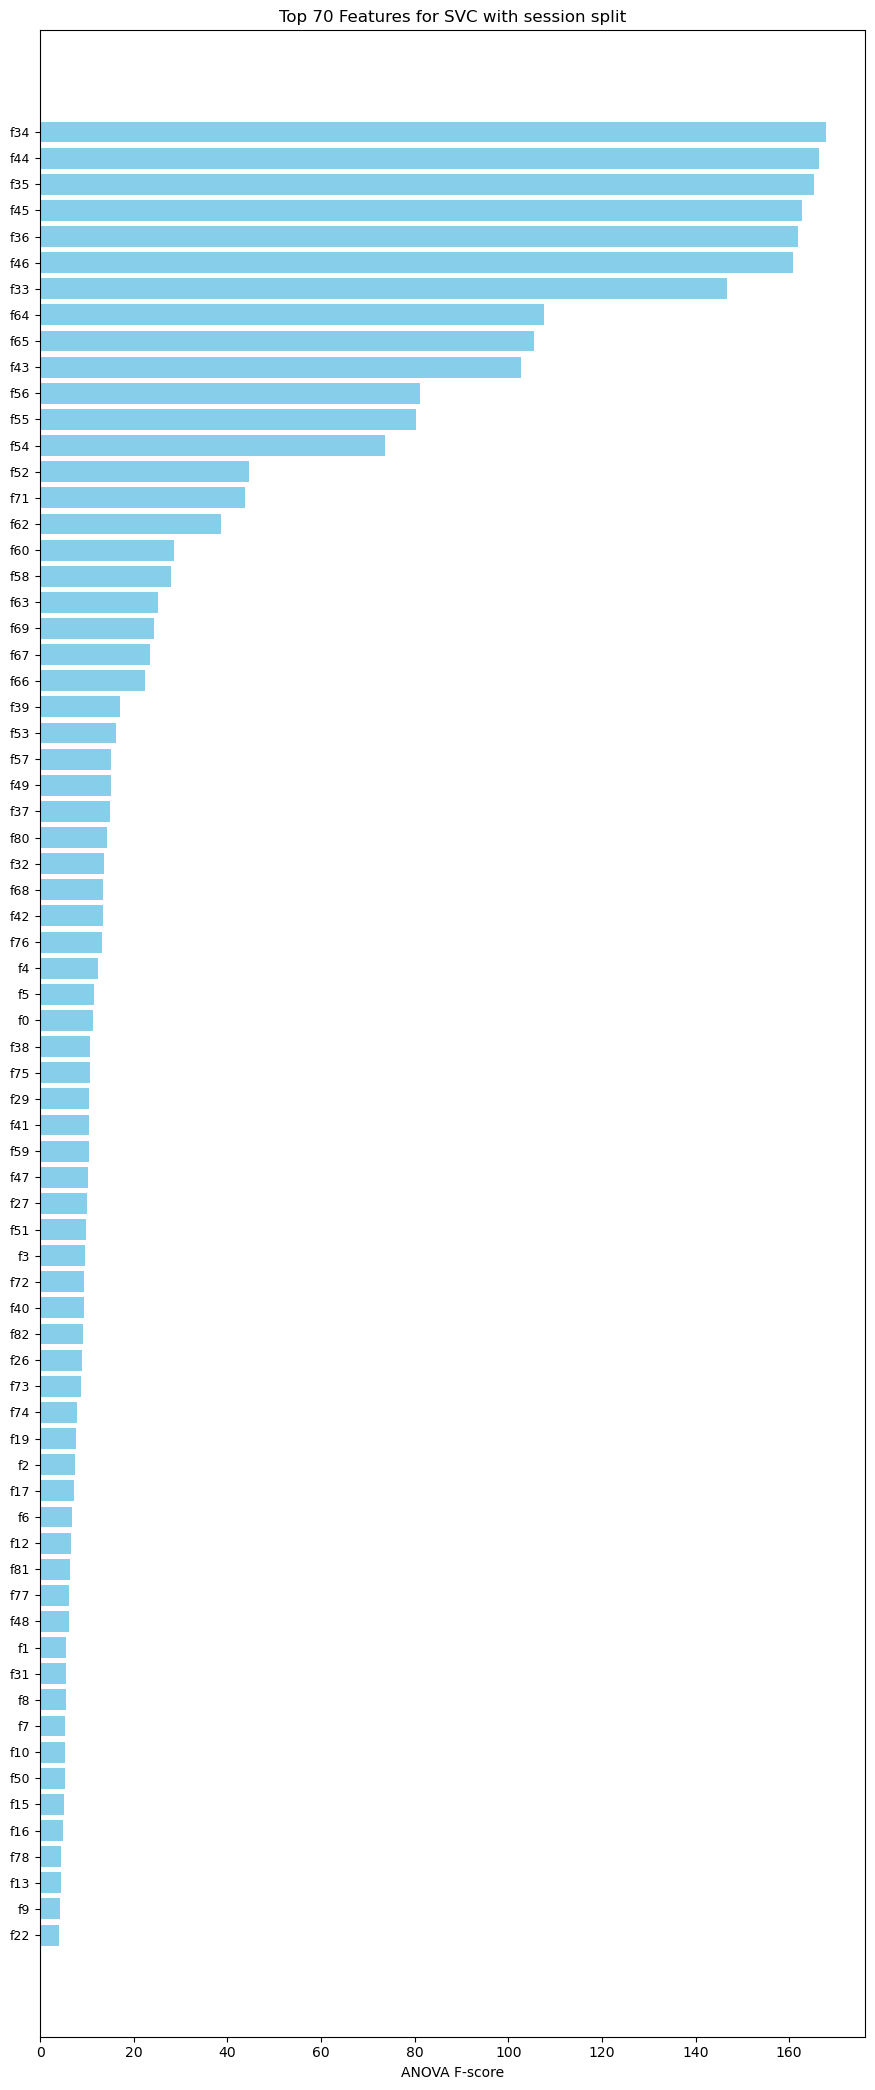

In [16]:
#Best features for SVC regression with session split
import matplotlib.pyplot as plt
import pandas as pd

feature_names = X_train.columns

selector = grid_search.best_estimator_.named_steps['feature_selection']
support_mask = selector.get_support()
scores = selector.scores_

selected_features = feature_names[support_mask]
selected_scores = scores[support_mask]

sorted_idx = selected_scores.argsort()[::-1]
sorted_features = selected_features[sorted_idx]
sorted_scores = selected_scores[sorted_idx]

k = grid_search.best_params_['feature_selection__k']

print(f"\nTop {k} features and their ANOVA F-scores:")
for name, score in zip(sorted_features[:k], sorted_scores[:k]):
    print(f"{name}: {score:.4f}")

plt.figure(figsize=(12, max(6, k * 0.3)))
plt.barh(sorted_features[:k][::-1], sorted_scores[:k][::-1], color='skyblue')
plt.xlabel('ANOVA F-score')
plt.title(f'Top {k} Features for SVC with session split')
plt.tight_layout()
plt.subplots_adjust(left=0.3)
plt.yticks(fontsize=9)

plt.savefig(r'C:\Users\david\OneDrive\Documenti\Tesi_BehavBio\Programs\Programs\Machine_Learning\Machine_Learning_results\Best_Features\svc_ss.png')  
plt.show()
